In [487]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from alphabase.spectral_library.base import SpecLibBase
from alphadia import data, planning
from alphadia.workflow import manager, peptidecentric

In [488]:
POOL_PROJECTS="/fs/pool/pool-mann-projects/"
POOL_MS="/fs/pool/pool-mann-ms14/"
PROJECT_FOLDER=f"{POOL_PROJECTS}despard/hpo/hpo_mse_2024_07_09/"

RAW_FOLDER = f"{POOL_MS}/Astral4/2024_07/"
LIBRARY_FOLDER=f"{PROJECT_FOLDER}libraries/"
OUTPUT_FOLDER=f"{PROJECT_FOLDER}output/"

In [489]:

MODE = "astral"

if MODE == "astral":
    raw_files = [
        os.path.join(
            RAW_FOLDER,
            "20240704_OA4_Evo11_16p3min_PaSk_SA_HYE_1002575_200ng_noF_03.raw",
        )
    ]
    output_location = os.path.join(OUTPUT_FOLDER, "debugging/")
    os.makedirs(output_location, exist_ok=True)
    fasta_path_list = [os.path.join(LIBRARY_FOLDER, x) for x in ["2024_02_21_human.fasta", "2024_02_21_yeast.fasta", "2024_02_21_ecoli.fasta"]]
elif MODE == "timstof":
    raw_files = [
        os.path.join(
            performance_test_folder,
            "raw_data/timstof_lf_diap/20230502_TIMS05_PaSk_SA_HeLa_21min_diaP_12scans_S2-A3_1_2089.d",
        )
    ]
    output_location = os.path.join(
        performance_test_folder, "outputs/timstof_lf_diaPASEF"
    )
    speclib_path = os.path.join(
        performance_test_folder,
        "libraries/timstof/21min_Evosep_HeLa_BR14_48fractions_diaPASEF_py_diAID_2_egs.hdf",
    )
else:
    raise ValueError("Unknown mode")

In [490]:
config = {
    "general": {
        "reuse_calibration": False,
        "reuse_quant": False,
        "thread_count": 10,
        "astral_ms1": False,
    },
    "search_advanced": {
        "top_k_fragments_scoring": 12,
    },
    "search": {
        "target_num_candidates": 5,
        "target_ms1_tolerance": 0.1 if MODE == "astral" else 15,
        "target_ms2_tolerance": 0.1 if MODE == "astral" else 15,
        "target_rt_tolerance": 1,
        "max_epochs" : 7,
    },
    "fdr": {"classifier": "legacy"},

    "library_prediction": {
      "predict": False,
      "enzyme": 'trypsin',
      "fixed_modifications": 'Carbamidomethyl@C',
      "variable_modifications": 'Oxidation@M;Acetyl@Protein N-term',
      "max_var_mod_num": 1,
      "missed_cleavages": 0,
      "precursor_len": [7, 35],
      "precursor_charge": [2, 4],
      "precursor_mz": [380, 980],
      "fragment_mz": [200, 2000],
      "nce": 25,
      "instrument": 'Lumos',
      "save_hdf": True,
    },
    "search_initial": {
      # Number of peak groups identified in the convolution score to classify with target decoy comeptition
      "initial_num_candidates": 1,
    
      # initial ms1 tolerance in ppm
      "initial_ms1_tolerance": 100,
    
      # initial ms2 tolerance in ppm
      "initial_ms2_tolerance": 100,
    
      # initial retention time tolerance in seconds
      "initial_rt_tolerance": 600,
    },
    "calibration":{
        "recalibration_target" : 50,
        "param_calibration_order" : [['ms2'], ['rt'], ['ms1', 'mobility']],
    }
}

speclib_path = "/fs/pool/pool-mann-projects/despard/hpo/hpo_mse_2024_07_09/output/debugging/speclib.hdf"

In [491]:
#plan = planning.Plan(output_location, raw_files, fasta_path_list=fasta_path_list, config=config)
plan = planning.Plan(output_location, raw_files, speclib_path, config=config)

0:00:00.009110 PROGRESS:           _      _         ___ ___   _   
0:00:00.010467 PROGRESS:      __ _| |_ __| |_  __ _|   \_ _| /_\  
0:00:00.011368 PROGRESS:     / _` | | '_ \ ' \/ _` | |) | | / _ \ 
0:00:00.012297 PROGRESS:     \__,_|_| .__/_||_\__,_|___/___/_/ \_\
0:00:00.013310 PROGRESS:            |_|                           
0:00:00.014166 PROGRESS: 
0:00:00.015152 PROGRESS: version: 1.7.2
0:00:00.015989 PROGRESS: hostname: hpcl8025
0:00:00.016999 PROGRESS: date: 2024-07-18 19:05:50
0:00:00.017824 PROGRESS: =================== Environment ===================
0:00:00.018827 PROGRESS: alphatims       : 1.0.8
0:00:00.019653 PROGRESS: alpharaw        : 0.4.5
0:00:00.020616 PROGRESS: alphabase       : 1.2.5
0:00:00.021144 PROGRESS: alphapeptdeep   : 1.2.1
0:00:00.021659 PROGRESS: directlfq       : 0.2.19
0:00:00.022197 PROGRESS: ===================================================
0:00:00.022822 INFO: loading default config from /fs/gpfs41/lv07/fileset03/home/b_mann/despard/git/alpha

In [492]:
for raw_name, dia_path, speclib in plan.get_run_data():
    pass

0:01:53.123831 PROGRESS: Loading raw file 1/1: 20240704_OA4_Evo11_16p3min_PaSk_SA_HYE_1002575_200ng_noF_03


In [508]:
workflow = peptidecentric.PeptideCentricWorkflow(
    raw_name,
    plan.config,
)


Testing!


In [510]:
workflow.load(dia_path, speclib)

24it [00:27,  1.15s/it]
15:18:44.041417 INFO: Determining DIA cycle
15:18:44.076218 INFO: Found cycle with start 0.00 min and length 151.
15:18:45.115270 INFO: ============ Raw file stats ============
15:18:45.117230 INFO: RT (min)            : 0.0 - 16.2
15:18:45.118311 INFO: RT duration (sec)   : 972.9
15:18:45.119249 INFO: RT duration (min)   : 16.2
15:18:45.120297 INFO: Cycle len (scans)   : 151
15:18:45.121204 INFO: Cycle len (sec)     : 1.23
15:18:45.122078 INFO: Number of cycles    : 787
15:18:45.122985 INFO: MS2 range (m/z)     : 380.4 - 980.7
15:18:45.123777 INFO: ========================================
15:18:46.882128 INFO: Initializing CalibrationManager
15:18:46.883986 INFO: Loading calibration config
15:18:46.885932 INFO: Calibration config: [{'name': 'fragment', 'estimators': [{'name': 'mz', 'model': 'LOESSRegression', 'model_args': {'n_kernels': 2}, 'input_columns': ['mz_library'], 'target_columns': ['mz_observed'], 'output_columns': ['mz_calibrated'], 'transform_deviat

In [512]:
workflow.initialize_managers()

15:31:06.248158 PROGRESS: Initializing workflow 20240704_OA4_Evo11_16p3min_PaSk_SA_HYE_1002575_200ng_noF_03
15:31:06.251007 INFO: Initializing OptimizationManager
15:31:06.251900 INFO: initial parameter: current_epoch = 0
15:31:06.252735 INFO: initial parameter: current_step = 0
15:31:06.253527 INFO: initial parameter: ms1_error = 100
15:31:06.254216 INFO: initial parameter: ms2_error = 100
15:31:06.254933 INFO: initial parameter: rt_error = 600
15:31:06.255718 INFO: initial parameter: mobility_error = 0.08
15:31:06.256449 INFO: initial parameter: column_type = library
15:31:06.257115 INFO: initial parameter: num_candidates = 1
15:31:06.257750 INFO: initial parameter: recalibration_target = 50
15:31:06.258299 INFO: initial parameter: accumulated_precursors = 0
15:31:06.258948 INFO: initial parameter: accumulated_precursors_01FDR = 0
15:31:06.259529 INFO: initial parameter: accumulated_precursors_001FDR = 0
15:31:06.260060 INFO: initial parameter: fitted_params = []
15:31:06.260692 INFO

15:31:08.959872 INFO: Fitting ['ms2'].
15:31:08.961619 INFO: === checking if epoch conditions were reached ===
15:31:08.963146 INFO:  ms2_error      : 100.0000 > 0.1
15:31:08.964312 INFO: ❌ current_epoch  : 0 < 2
15:31:08.965516 INFO: ==============================================
15:31:09.065218 INFO: calibration group: precursor, predicting mz
15:31:09.066873 WARNING: mz prediction was skipped as it has not been fitted yet
15:31:09.067834 INFO: calibration group: precursor, predicting rt
15:31:09.069174 WARNING: rt prediction was skipped as it has not been fitted yet
15:31:09.069904 INFO: calibration group: fragment, predicting mz
15:31:18.228861 PROGRESS: === Epoch 0, step 0, extracting elution groups 0 to 8000 ===
15:31:18.276206 PROGRESS: Extracting batch of 15852 precursors
15:31:18.283316 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:31:18.284467 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:31:18.285332 INFO: FWHM in RT is 2.24 seconds,

Using base classifier


100%|██████████| 3/3 [00:00<00:00, 68385.39it/s]
15:31:32.824569 INFO: Test AUC: 0.540
15:31:32.825706 INFO: Train AUC: 0.558
15:31:32.826533 INFO: AUC difference: 3.19%


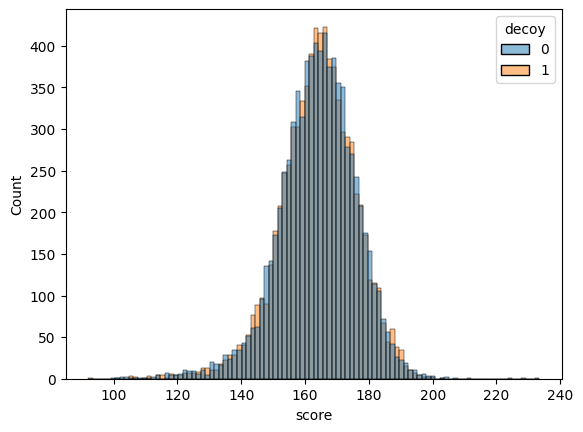

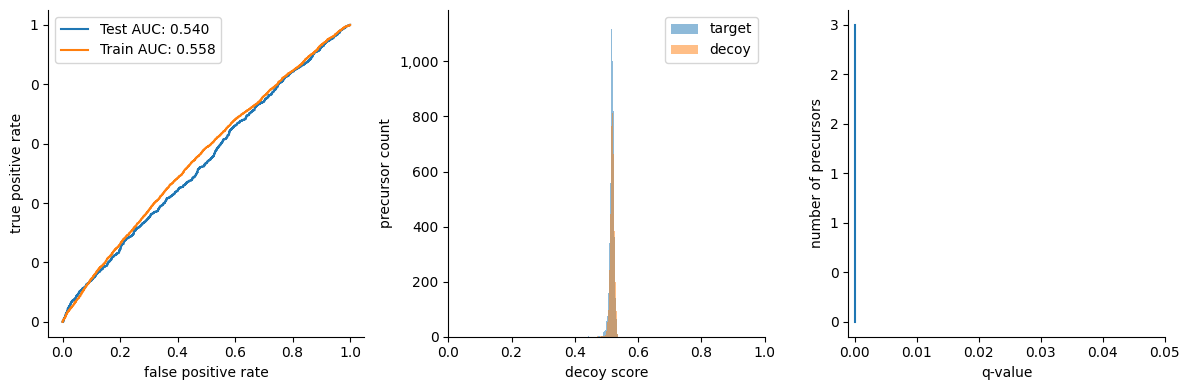

15:31:33.438805 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:31:33.441516 PROGRESS: ============================= Precursor FDR =============================
15:31:33.442873 PROGRESS: Total precursors accumulated: 4
15:31:33.444344 PROGRESS: Target precursors: 4 (100.00%)
15:31:33.445678 PROGRESS: Decoy precursors: 0 (0.00%)
15:31:33.447022 PROGRESS: 
15:31:33.447990 PROGRESS: Precursor Summary:
15:31:33.450961 PROGRESS: Channel   0:	 0.05 FDR:     4; 0.01 FDR:     4; 0.001 FDR:     4
15:31:33.452102 PROGRESS: 
15:31:33.453072 PROGRESS: Protein Summary:
15:31:33.456304 PROGRESS: Channel   0:	 0.05 FDR:     4; 0.01 FDR:     4; 0.001 FDR:     4
15:31:33.457265 PROGRESS: =========================================================================
15:31:33.459331 PROGRESS: === Epoch 0, step 1, extracting elution groups 8000 to 24000 ===
15:31:33.515631 PROGRESS: Extracting batch of 31711 precursors
15:31:33.529237 INFO: Duty cycle consists of 15

Storing classifier: 1dbbc056e05895b0


100%|██████████| 31711/31711 [00:13<00:00, 2272.87it/s]
15:31:49.324725 INFO: Starting candidate scoring
100%|██████████| 31709/31709 [00:01<00:00, 28915.64it/s]
15:31:51.112479 INFO: Finished candidate processing
15:31:51.113731 INFO: Collecting candidate features
15:31:52.334896 INFO: Collecting fragment features
15:31:52.662255 INFO: Finished candidate scoring
15:31:52.918286 PROGRESS: === Epoch 0, step 1, extracted 31709 precursors and 364682 fragments ===
15:31:52.921188 INFO: performing precursor FDR with 47 features
15:31:52.922399 INFO: Decoy channel: -1
15:31:52.923643 INFO: Competetive: True


Using classifier: 1dbbc056e05895b0


100%|██████████| 87/87 [00:00<00:00, 268114.95it/s]
15:31:53.807594 INFO: Test AUC: 0.590
15:31:53.808977 INFO: Train AUC: 0.605
15:31:53.809900 INFO: AUC difference: 2.49%


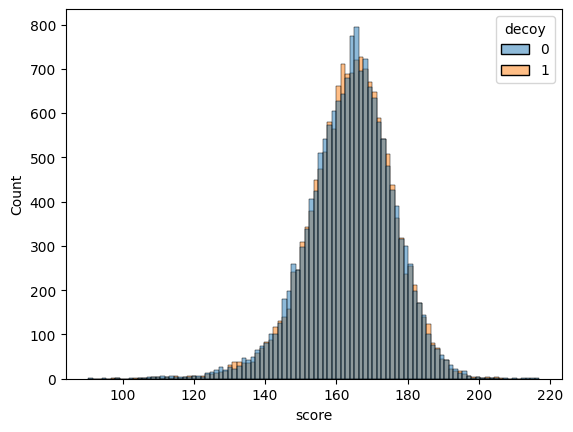

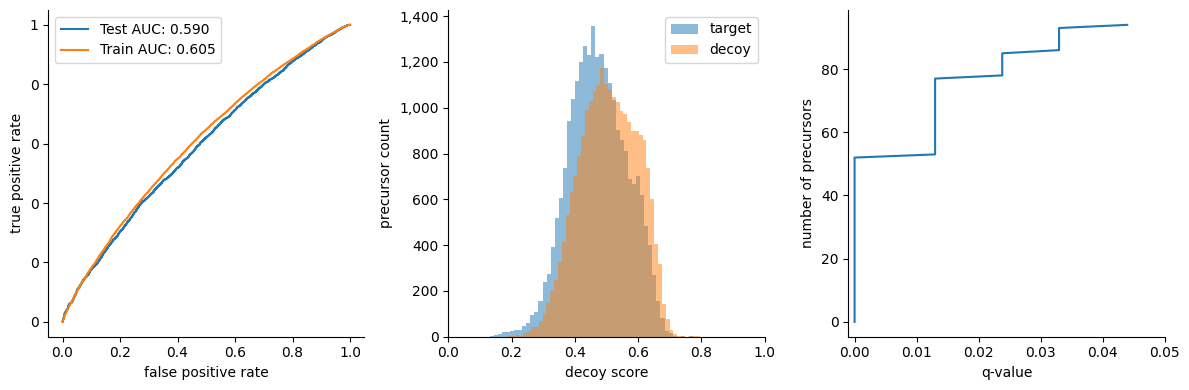

15:31:54.469434 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:31:54.472486 PROGRESS: ============================= Precursor FDR =============================
15:31:54.474419 PROGRESS: Total precursors accumulated: 144
15:31:54.476192 PROGRESS: Target precursors: 132 (91.67%)
15:31:54.478036 PROGRESS: Decoy precursors: 12 (8.33%)
15:31:54.479696 PROGRESS: 
15:31:54.481372 PROGRESS: Precursor Summary:
15:31:54.484510 PROGRESS: Channel   0:	 0.05 FDR:    91; 0.01 FDR:    53; 0.001 FDR:    53
15:31:54.486277 PROGRESS: 
15:31:54.487657 PROGRESS: Protein Summary:
15:31:54.490896 PROGRESS: Channel   0:	 0.05 FDR:    87; 0.01 FDR:    52; 0.001 FDR:    52
15:31:54.492159 PROGRESS: =========================================================================
15:31:54.499614 INFO: calibration group: fragment, fitting mz estimator 


Storing classifier: 1dbbc056e05895b0
fragments_df_filtered: 500


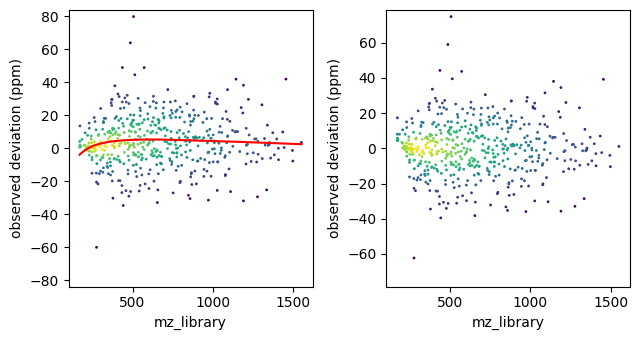

15:31:54.760066 INFO: === checking if epoch conditions were reached ===
15:31:54.762156 INFO:  ms2_error      : 44.5760 > 0.1
15:31:54.763715 INFO: ❌ current_epoch  : 0 < 2
15:31:54.765275 INFO: ==============================================
15:31:54.766911 PROGRESS: Calibration dataframe has been frozen.
15:31:54.768622 INFO: calibration group: precursor, predicting mz
15:31:54.770424 WARNING: mz prediction was skipped as it has not been fitted yet
15:31:54.771254 INFO: calibration group: precursor, predicting rt
15:31:54.772522 WARNING: rt prediction was skipped as it has not been fitted yet
15:31:54.773221 INFO: calibration group: fragment, predicting mz


score cutoff 92.08622677612304


15:32:04.238028 PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 24000 ===
15:32:04.326222 PROGRESS: Extracting batch of 47563 precursors
15:32:04.349572 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:32:04.350878 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:32:04.351754 INFO: FWHM in RT is 2.33 seconds, sigma is 0.40
15:32:04.352620 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:32:04.354044 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:21<00:00, 2229.45it/s]
15:32:27.856042 INFO: Starting candidate scoring
100%|██████████| 237805/237805 [00:07<00:00, 29791.12it/s]
15:32:36.868558 INFO: Finished candidate processing
15:32:36.870988 INFO: Collecting candidate features
15:32:38.605986 INFO: Collecting fragment features
15:32:39.218263 INFO: Finished candidate scoring
15:32:39.605662 PROGRESS: === Epoch 1, step 0, extracted 237805 precursors and 2718777 fragments ===
15:32:39.608209 INFO: performing pre

Using classifier: 1dbbc056e05895b0


100%|██████████| 146/146 [00:00<00:00, 13825.09it/s]
15:32:44.301743 INFO: Test AUC: 0.590
15:32:44.302994 INFO: Train AUC: 0.604
15:32:44.303839 INFO: AUC difference: 2.34%


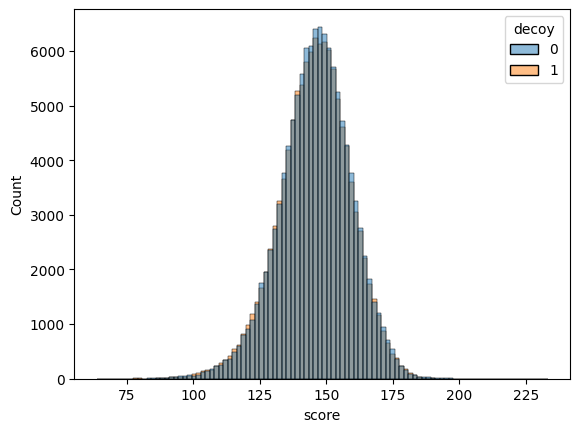

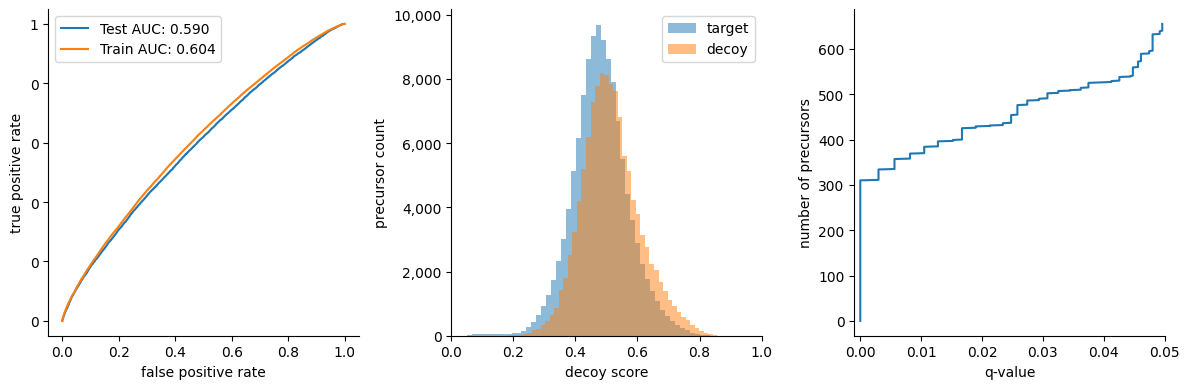

15:32:45.061618 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:32:45.064944 PROGRESS: ============================= Precursor FDR =============================
15:32:45.066353 PROGRESS: Total precursors accumulated: 728
15:32:45.067582 PROGRESS: Target precursors: 682 (93.68%)
15:32:45.068928 PROGRESS: Decoy precursors: 46 (6.32%)
15:32:45.070293 PROGRESS: 
15:32:45.071616 PROGRESS: Precursor Summary:
15:32:45.075264 PROGRESS: Channel   0:	 0.05 FDR:   625; 0.01 FDR:   367; 0.001 FDR:   311
15:32:45.076272 PROGRESS: 
15:32:45.077243 PROGRESS: Protein Summary:
15:32:45.081190 PROGRESS: Channel   0:	 0.05 FDR:   578; 0.01 FDR:   342; 0.001 FDR:   294
15:32:45.082150 PROGRESS: =========================================================================
15:32:45.109646 INFO: calibration group: fragment, fitting mz estimator 


Storing classifier: 03a2f02d595f0537
fragments_df_filtered: 5000


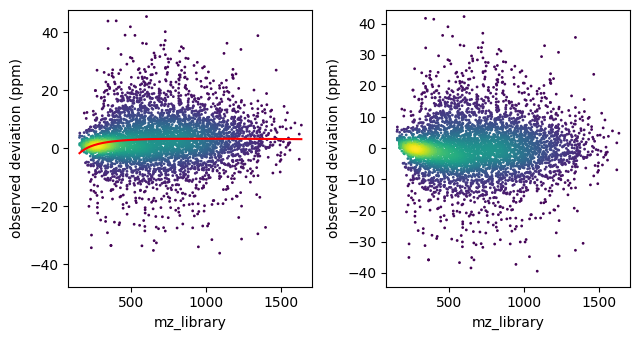

15:32:46.103490 INFO: === checking if epoch conditions were reached ===
15:32:46.105008 INFO:  ms2_error      : 31.9123 > 0.1
15:32:46.106421 INFO: ❌ current_epoch  : 1 < 2
15:32:46.107798 INFO: ==============================================
15:32:46.109035 INFO: calibration group: precursor, predicting mz
15:32:46.110278 WARNING: mz prediction was skipped as it has not been fitted yet
15:32:46.110921 INFO: calibration group: precursor, predicting rt
15:32:46.112127 WARNING: rt prediction was skipped as it has not been fitted yet
15:32:46.112758 INFO: calibration group: fragment, predicting mz


score cutoff 112.07375646972656


15:32:55.267023 PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 24000 ===
15:32:55.356309 PROGRESS: Extracting batch of 47563 precursors
15:32:55.377866 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:32:55.379113 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:32:55.379971 INFO: FWHM in RT is 2.55 seconds, sigma is 0.44
15:32:55.380721 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:32:55.382069 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:20<00:00, 2286.36it/s]
15:33:18.337415 INFO: Starting candidate scoring
100%|██████████| 237805/237805 [00:07<00:00, 29965.90it/s]
15:33:27.276684 INFO: Finished candidate processing
15:33:27.278149 INFO: Collecting candidate features
15:33:28.938844 INFO: Collecting fragment features
15:33:29.526850 INFO: Finished candidate scoring
15:33:29.894706 PROGRESS: === Epoch 2, step 0, extracted 237805 precursors and 2694260 fragments ===
15:33:29.896890 INFO: performing pre

Using classifier: 1dbbc056e05895b0


100%|██████████| 149/149 [00:00<00:00, 14138.53it/s]
15:33:34.189031 INFO: Test AUC: 0.591
15:33:34.190309 INFO: Train AUC: 0.602
15:33:34.191158 INFO: AUC difference: 1.87%


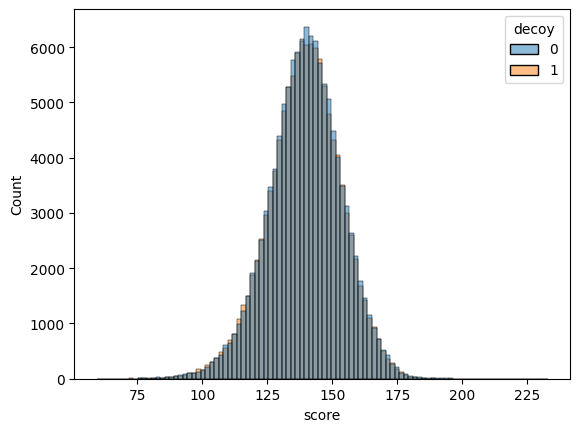

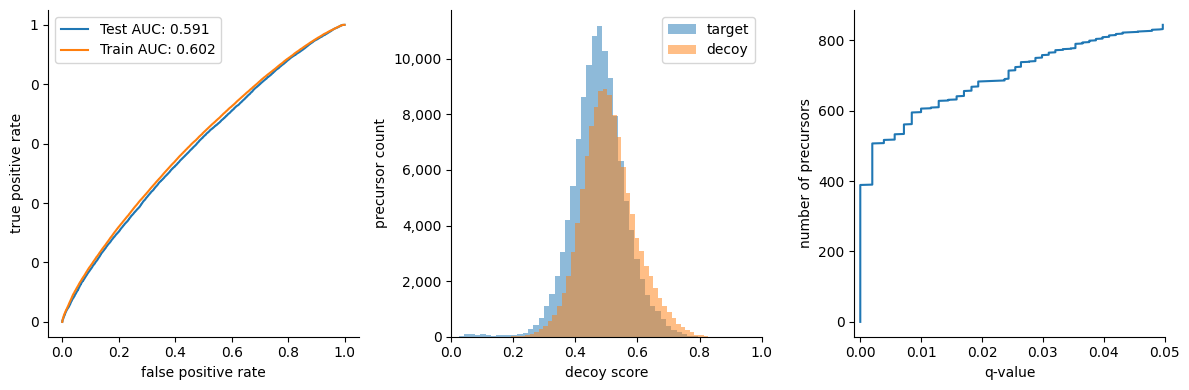

15:33:34.885286 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:33:34.888288 PROGRESS: ============================= Precursor FDR =============================
15:33:34.889908 PROGRESS: Total precursors accumulated: 955
15:33:34.891320 PROGRESS: Target precursors: 885 (92.67%)
15:33:34.892704 PROGRESS: Decoy precursors: 70 (7.33%)
15:33:34.894093 PROGRESS: 
15:33:34.895262 PROGRESS: Precursor Summary:
15:33:34.898702 PROGRESS: Channel   0:	 0.05 FDR:   805; 0.01 FDR:   601; 0.001 FDR:   390
15:33:34.899682 PROGRESS: 
15:33:34.900623 PROGRESS: Protein Summary:
15:33:34.904570 PROGRESS: Channel   0:	 0.05 FDR:   729; 0.01 FDR:   542; 0.001 FDR:   357
15:33:34.905511 PROGRESS: =========================================================================
15:33:34.930917 INFO: calibration group: fragment, fitting mz estimator 


Storing classifier: 48aa7ecdb550b9c3
fragments_df_filtered: 5000


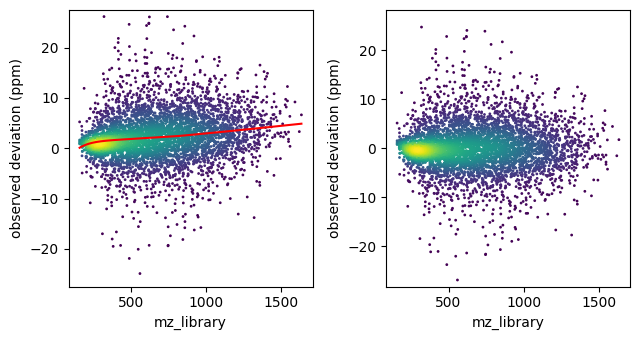

15:33:35.892199 INFO: === checking if epoch conditions were reached ===
15:33:35.893556 INFO:  ms2_error      : 17.6259 > 0.1
15:33:35.894637 INFO: ✅ current_epoch  : 2 >= 2
15:33:35.895726 INFO: ==============================================
15:33:35.896896 INFO: calibration group: precursor, predicting mz
15:33:35.898164 WARNING: mz prediction was skipped as it has not been fitted yet
15:33:35.898846 INFO: calibration group: precursor, predicting rt
15:33:35.900180 WARNING: rt prediction was skipped as it has not been fitted yet
15:33:35.900871 INFO: calibration group: fragment, predicting mz


score cutoff 107.69651489257812


15:33:45.019162 PROGRESS: === Epoch 3, step 0, extracting elution groups 0 to 24000 ===
15:33:45.110200 PROGRESS: Extracting batch of 47563 precursors
15:33:45.132076 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:33:45.133340 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:33:45.134282 INFO: FWHM in RT is 2.56 seconds, sigma is 0.44
15:33:45.135208 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:33:45.136737 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:20<00:00, 2336.57it/s]
15:34:07.571500 INFO: Starting candidate scoring
100%|██████████| 237805/237805 [00:07<00:00, 31014.61it/s]
15:34:16.224652 INFO: Finished candidate processing
15:34:16.227048 INFO: Collecting candidate features
15:34:17.880602 INFO: Collecting fragment features
15:34:18.466150 INFO: Finished candidate scoring
15:34:18.839405 PROGRESS: === Epoch 3, step 0, extracted 237805 precursors and 2596773 fragments ===
15:34:18.841371 INFO: performing pre

Using classifier: 1dbbc056e05895b0


100%|██████████| 150/150 [00:00<00:00, 14254.06it/s]
15:34:23.538138 INFO: Test AUC: 0.591
15:34:23.539437 INFO: Train AUC: 0.601
15:34:23.540474 INFO: AUC difference: 1.68%


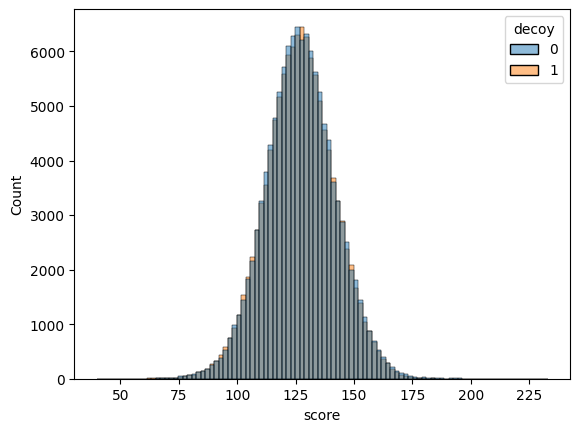

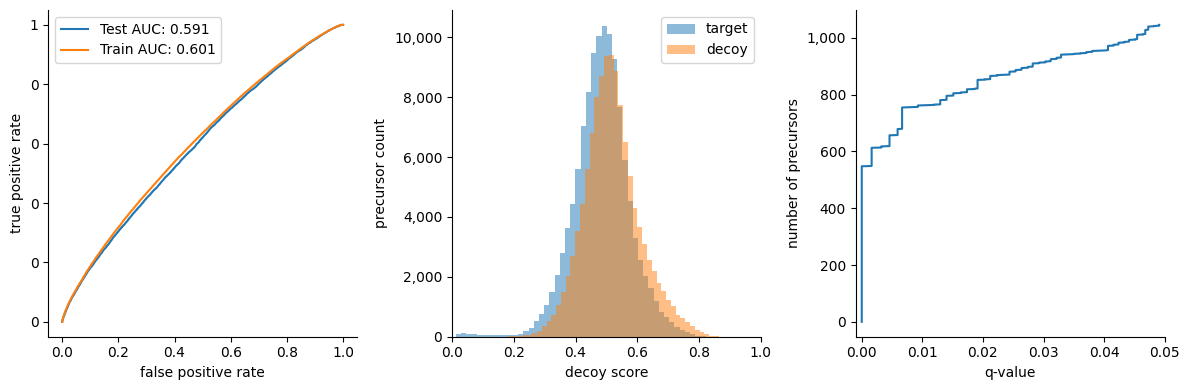

15:34:24.302675 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:34:24.305848 PROGRESS: ============================= Precursor FDR =============================
15:34:24.307060 PROGRESS: Total precursors accumulated: 1,155
15:34:24.308313 PROGRESS: Target precursors: 1,079 (93.42%)
15:34:24.309540 PROGRESS: Decoy precursors: 76 (6.58%)
15:34:24.311420 PROGRESS: 
15:34:24.312711 PROGRESS: Precursor Summary:
15:34:24.317006 PROGRESS: Channel   0:	 0.05 FDR:   998; 0.01 FDR:   756; 0.001 FDR:   549
15:34:24.318125 PROGRESS: 
15:34:24.319036 PROGRESS: Protein Summary:
15:34:24.323311 PROGRESS: Channel   0:	 0.05 FDR:   883; 0.01 FDR:   671; 0.001 FDR:   500
15:34:24.324229 PROGRESS: =========================================================================
15:34:24.356367 INFO: calibration group: fragment, fitting mz estimator 


Storing classifier: 6bdd73c377b402e5
fragments_df_filtered: 5000


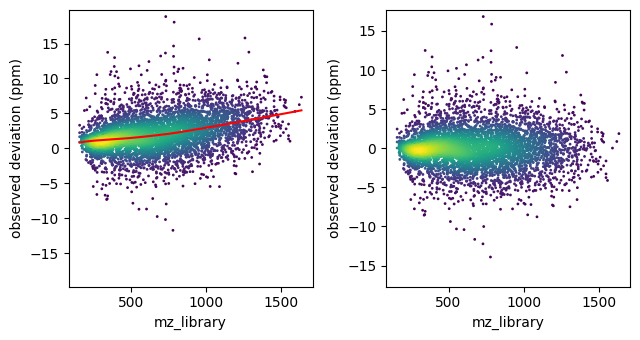

15:34:25.349054 INFO: === checking if epoch conditions were reached ===
15:34:25.350072 INFO:  ms2_error      : 8.8121 > 0.1
15:34:25.350885 INFO: ✅ current_epoch  : 3 >= 2
15:34:25.351599 INFO: ==============================================
15:34:25.352412 INFO: calibration group: precursor, predicting mz
15:34:25.353147 WARNING: mz prediction was skipped as it has not been fitted yet
15:34:25.353811 INFO: calibration group: precursor, predicting rt
15:34:25.354670 WARNING: rt prediction was skipped as it has not been fitted yet
15:34:25.355207 INFO: calibration group: fragment, predicting mz


score cutoff 87.26858772277832


15:34:34.461016 PROGRESS: === Epoch 4, step 0, extracting elution groups 0 to 24000 ===
15:34:34.543329 PROGRESS: Extracting batch of 47563 precursors
15:34:34.564459 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:34:34.565716 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:34:34.566595 INFO: FWHM in RT is 2.53 seconds, sigma is 0.43
15:34:34.567359 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:34:34.568679 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:20<00:00, 2329.92it/s]
15:34:57.075787 INFO: Starting candidate scoring
100%|██████████| 237805/237805 [00:06<00:00, 35012.84it/s]
15:35:04.860693 INFO: Finished candidate processing
15:35:04.862160 INFO: Collecting candidate features
15:35:06.506541 INFO: Collecting fragment features
15:35:07.072823 INFO: Finished candidate scoring
15:35:07.441506 PROGRESS: === Epoch 4, step 0, extracted 237804 precursors and 2332512 fragments ===
15:35:07.444136 INFO: performing pre

Using classifier: 1dbbc056e05895b0


100%|██████████| 150/150 [00:00<00:00, 14279.62it/s]
15:35:11.751342 INFO: Test AUC: 0.589
15:35:11.752555 INFO: Train AUC: 0.602
15:35:11.753383 INFO: AUC difference: 2.15%


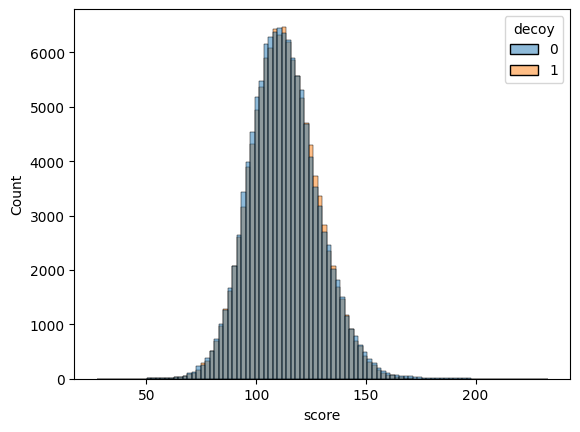

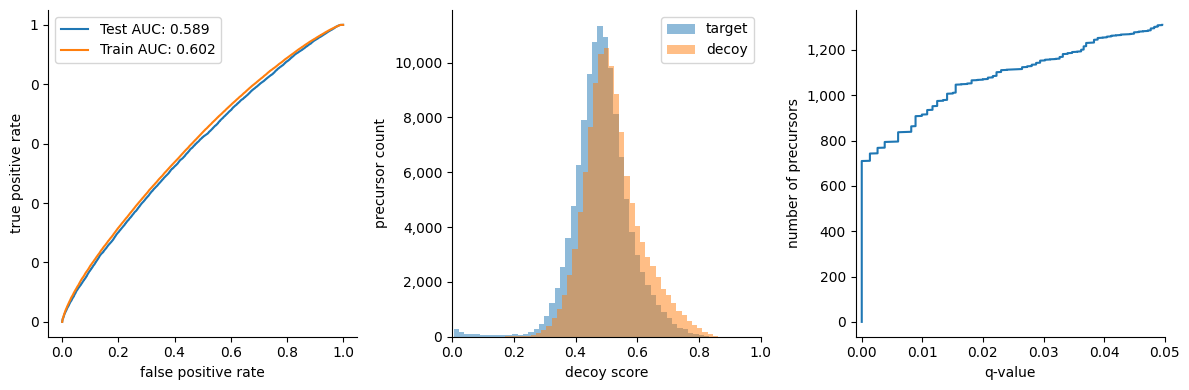

15:35:12.448215 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:35:12.451421 PROGRESS: ============================= Precursor FDR =============================
15:35:12.452506 PROGRESS: Total precursors accumulated: 1,601
15:35:12.453999 PROGRESS: Target precursors: 1,468 (91.69%)
15:35:12.455012 PROGRESS: Decoy precursors: 133 (8.31%)
15:35:12.456264 PROGRESS: 
15:35:12.457389 PROGRESS: Precursor Summary:
15:35:12.461497 PROGRESS: Channel   0:	 0.05 FDR: 1,250; 0.01 FDR:   907; 0.001 FDR:   711
15:35:12.462593 PROGRESS: 
15:35:12.463643 PROGRESS: Protein Summary:
15:35:12.468155 PROGRESS: Channel   0:	 0.05 FDR: 1,107; 0.01 FDR:   810; 0.001 FDR:   636
15:35:12.468935 PROGRESS: =========================================================================
15:35:12.493517 INFO: calibration group: fragment, fitting mz estimator 


Storing classifier: 9ac56118ad360ae9
fragments_df_filtered: 5000


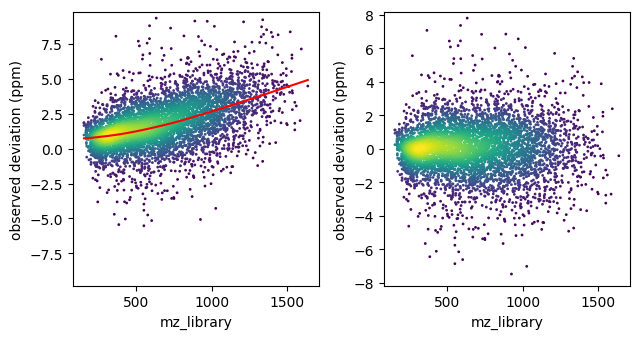

15:35:13.522547 INFO: === checking if epoch conditions were reached ===
15:35:13.523828 INFO:  ms2_error      : 5.2232 > 0.1
15:35:13.524901 INFO: ✅ current_epoch  : 4 >= 2
15:35:13.525924 INFO: ==============================================
15:35:13.526992 INFO: calibration group: precursor, predicting mz
15:35:13.528011 WARNING: mz prediction was skipped as it has not been fitted yet
15:35:13.528629 INFO: calibration group: precursor, predicting rt
15:35:13.529855 WARNING: rt prediction was skipped as it has not been fitted yet
15:35:13.530497 INFO: calibration group: fragment, predicting mz


score cutoff 87.35824899291993


15:35:22.627133 PROGRESS: === Epoch 5, step 0, extracting elution groups 0 to 24000 ===
15:35:22.725358 PROGRESS: Extracting batch of 47563 precursors
15:35:22.747634 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:35:22.748924 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:35:22.749783 INFO: FWHM in RT is 2.43 seconds, sigma is 0.42
15:35:22.750565 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:35:22.752300 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:19<00:00, 2386.92it/s]
15:35:44.769037 INFO: Starting candidate scoring
100%|██████████| 237805/237805 [00:06<00:00, 38320.18it/s]
15:35:51.971515 INFO: Finished candidate processing
15:35:51.973659 INFO: Collecting candidate features
15:35:53.580389 INFO: Collecting fragment features
15:35:54.134523 INFO: Finished candidate scoring
15:35:54.474439 PROGRESS: === Epoch 5, step 0, extracted 237799 precursors and 2097634 fragments ===
15:35:54.476580 INFO: performing pre

Using classifier: 1dbbc056e05895b0


100%|██████████| 150/150 [00:00<00:00, 14233.74it/s]
15:35:58.786506 INFO: Test AUC: 0.587
15:35:58.787740 INFO: Train AUC: 0.602
15:35:58.788602 INFO: AUC difference: 2.55%


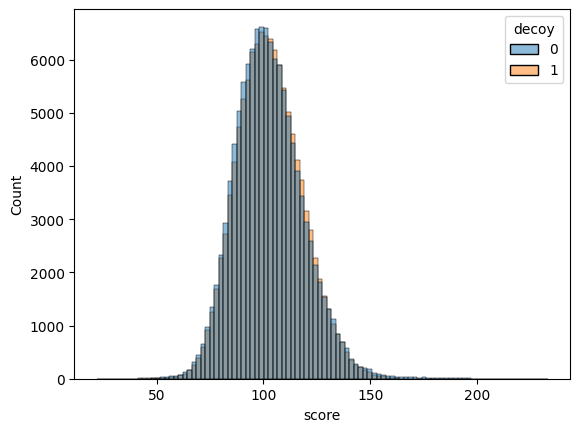

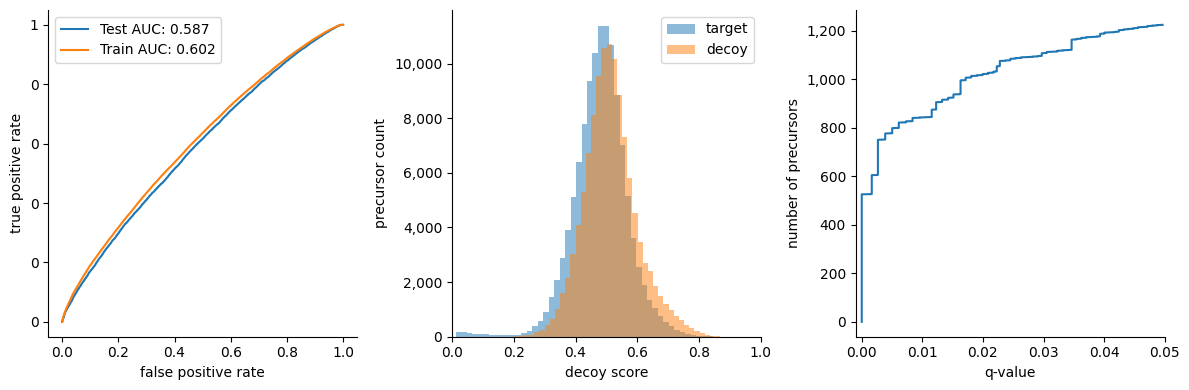

15:35:59.480957 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:35:59.484806 PROGRESS: ============================= Precursor FDR =============================
15:35:59.485947 PROGRESS: Total precursors accumulated: 1,503
15:35:59.487258 PROGRESS: Target precursors: 1,380 (91.82%)
15:35:59.488713 PROGRESS: Decoy precursors: 123 (8.18%)
15:35:59.489697 PROGRESS: 
15:35:59.491224 PROGRESS: Precursor Summary:
15:35:59.498020 PROGRESS: Channel   0:	 0.05 FDR: 1,168; 0.01 FDR:   836; 0.001 FDR:   527
15:35:59.498986 PROGRESS: 
15:35:59.499873 PROGRESS: Protein Summary:
15:35:59.504031 PROGRESS: Channel   0:	 0.05 FDR: 1,036; 0.01 FDR:   748; 0.001 FDR:   477
15:35:59.505197 PROGRESS: =========================================================================
15:35:59.527255 INFO: calibration group: fragment, fitting mz estimator 


Storing classifier: 96a5f267d403fbef
fragments_df_filtered: 5000


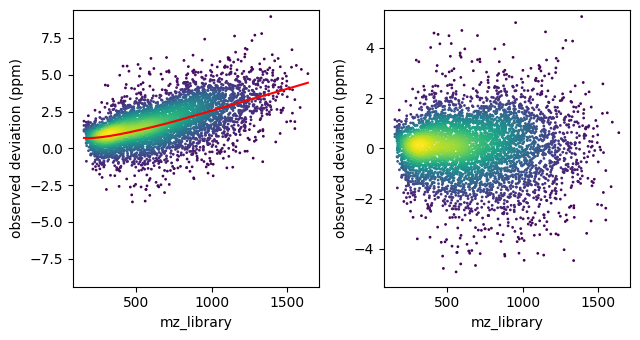

15:36:00.497170 INFO: === checking if epoch conditions were reached ===
15:36:00.498502 INFO:  ms2_error      : 3.9788 > 0.1
15:36:00.499964 INFO: ✅ current_epoch  : 5 >= 2
15:36:00.501278 INFO: ==============================================
15:36:00.502890 INFO: calibration group: precursor, predicting mz
15:36:00.504158 WARNING: mz prediction was skipped as it has not been fitted yet
15:36:00.504870 INFO: calibration group: precursor, predicting rt
15:36:00.506099 WARNING: rt prediction was skipped as it has not been fitted yet
15:36:00.506766 INFO: calibration group: fragment, predicting mz


score cutoff 91.4532239151001


15:36:09.596870 PROGRESS: === Epoch 6, step 0, extracting elution groups 0 to 24000 ===
15:36:09.678748 PROGRESS: Extracting batch of 47563 precursors
15:36:09.699115 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:36:09.700362 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:36:09.701230 INFO: FWHM in RT is 2.32 seconds, sigma is 0.40
15:36:09.701971 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:36:09.703526 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:20<00:00, 2332.78it/s]
15:36:32.253495 INFO: Starting candidate scoring
100%|██████████| 237805/237805 [00:05<00:00, 41623.07it/s]
15:36:38.992348 INFO: Finished candidate processing
15:36:38.993927 INFO: Collecting candidate features
15:36:40.612676 WARNING: intensity_correlation has 49 NaNs ( 0.02 % out of 237694)
15:36:40.642777 INFO: Collecting fragment features
15:36:41.159445 INFO: Finished candidate scoring
15:36:41.497544 PROGRESS: === Epoch 6, step 0, extract

Using classifier: 1dbbc056e05895b0


15:36:41.710703 WARNING: dropped 26 target PSMs due to missing features
15:36:41.711841 WARNING: dropped 23 decoy PSMs due to missing features
100%|██████████| 150/150 [00:00<00:00, 14254.70it/s]
15:36:46.056955 INFO: Test AUC: 0.587
15:36:46.058237 INFO: Train AUC: 0.600
15:36:46.059107 INFO: AUC difference: 2.05%


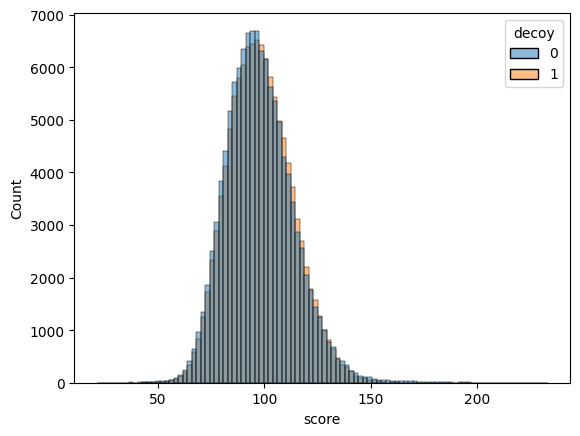

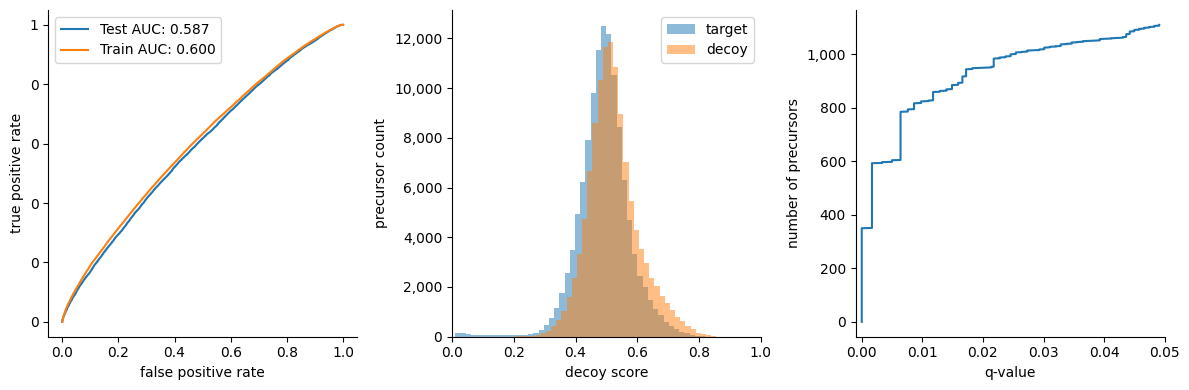

15:36:46.811595 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:36:46.814842 PROGRESS: ============================= Precursor FDR =============================
15:36:46.816338 PROGRESS: Total precursors accumulated: 1,352
15:36:46.817631 PROGRESS: Target precursors: 1,233 (91.20%)
15:36:46.818734 PROGRESS: Decoy precursors: 119 (8.80%)
15:36:46.819952 PROGRESS: 
15:36:46.821189 PROGRESS: Precursor Summary:
15:36:46.825906 PROGRESS: Channel   0:	 0.05 FDR: 1,059; 0.01 FDR:   817; 0.001 FDR:   351
15:36:46.826865 PROGRESS: 
15:36:46.827771 PROGRESS: Protein Summary:
15:36:46.831995 PROGRESS: Channel   0:	 0.05 FDR:   941; 0.01 FDR:   731; 0.001 FDR:   323
15:36:46.832944 PROGRESS: =========================================================================
15:36:46.852714 INFO: calibration group: fragment, fitting mz estimator 


Storing classifier: 2c950569873d586a
fragments_df_filtered: 5000


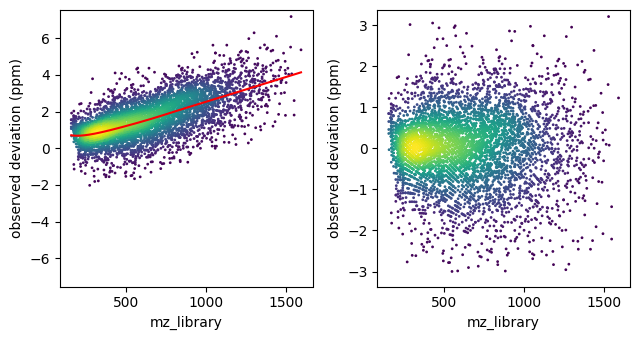

15:36:47.845625 INFO: === checking if epoch conditions were reached ===
15:36:47.847329 INFO:  ms2_error      : 2.6898 > 0.1
15:36:47.848731 INFO: ✅ current_epoch  : 6 >= 2
15:36:47.850096 INFO: ==============================================
15:36:47.927156 PROGRESS: Optimal values for ['ms2'] is/are {'ms2': 0            486.240570
1            261.126953
2            824.439026
3            412.722717
4            360.195496
               ...     
41372560    1005.528503
41372561     732.374451
41372562     788.916687
41372563    1301.714722
41372564     651.359680
Name: mz_calibrated, Length: 41372565, dtype: float32, 'rt': 0          371.788025
1          371.788025
2          381.919891
3          381.919891
4          483.009369
              ...    
3517492    482.862366
3517493    637.746338
3517494    637.746338
3517495    595.482239
3517496    595.482239
Name: rt_library, Length: 3481959, dtype: float32, 'ms1': 0          508.790375
1          542.782043
2          534.784546

score cutoff 87.67356024169922
6
6
-1


15:36:57.178750 PROGRESS: === Epoch 0, step 0, extracting elution groups 0 to 24000 ===
15:36:57.264914 PROGRESS: Extracting batch of 47563 precursors
15:36:57.286871 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:36:57.288163 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:36:57.289035 INFO: FWHM in RT is 2.24 seconds, sigma is 0.39
15:36:57.289797 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:36:57.291110 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:19<00:00, 2400.95it/s]
15:37:19.211372 INFO: Starting candidate scoring
100%|██████████| 237805/237805 [00:05<00:00, 42893.35it/s]
15:37:25.748407 INFO: Finished candidate processing
15:37:25.750702 INFO: Collecting candidate features
15:37:27.351260 WARNING: intensity_correlation has 190 NaNs ( 0.08 % out of 237311)
15:37:27.379700 INFO: Collecting fragment features
15:37:27.868613 INFO: Finished candidate scoring
15:37:28.226806 PROGRESS: === Epoch 0, step 0, extrac

Using classifier: 96a5f267d403fbef


15:37:28.435685 WARNING: dropped 106 target PSMs due to missing features
15:37:28.437136 WARNING: dropped 84 decoy PSMs due to missing features
100%|██████████| 150/150 [00:00<00:00, 14351.93it/s]
15:37:32.460691 INFO: Test AUC: 0.589
15:37:32.461818 INFO: Train AUC: 0.603
15:37:32.462760 INFO: AUC difference: 2.24%


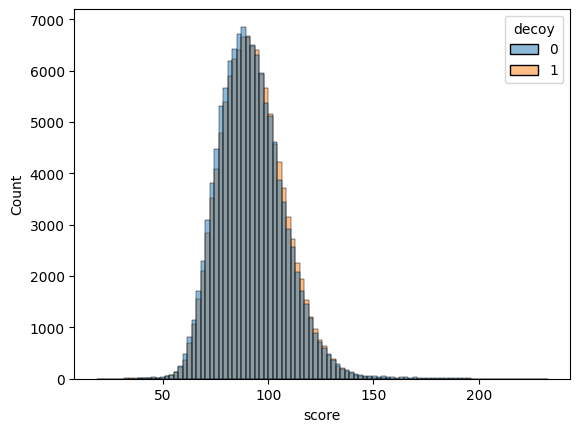

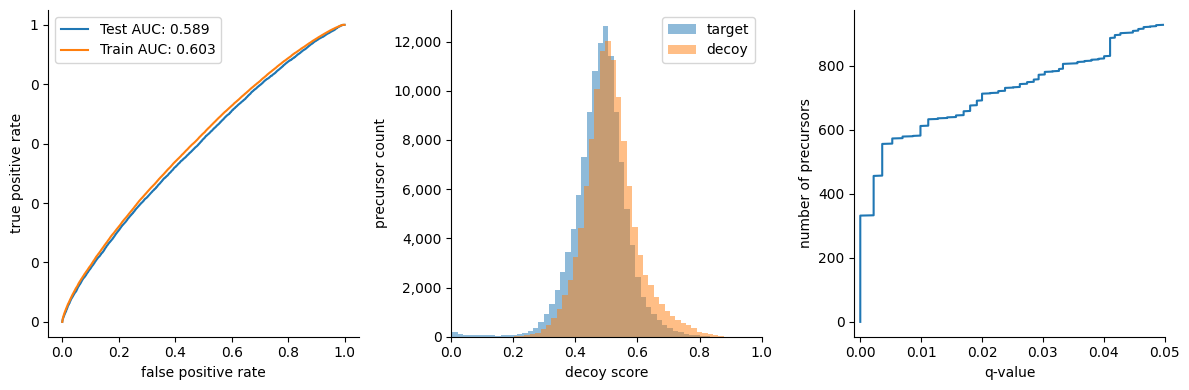

15:37:33.153762 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:37:33.156851 PROGRESS: ============================= Precursor FDR =============================
15:37:33.157917 PROGRESS: Total precursors accumulated: 1,223
15:37:33.159385 PROGRESS: Target precursors: 1,115 (91.17%)
15:37:33.160722 PROGRESS: Decoy precursors: 108 (8.83%)
15:37:33.162193 PROGRESS: 
15:37:33.163433 PROGRESS: Precursor Summary:
15:37:33.167519 PROGRESS: Channel   0:	 0.05 FDR:   885; 0.01 FDR:   607; 0.001 FDR:   333
15:37:33.168940 PROGRESS: 
15:37:33.170012 PROGRESS: Protein Summary:
15:37:33.173852 PROGRESS: Channel   0:	 0.05 FDR:   795; 0.01 FDR:   547; 0.001 FDR:   307
15:37:33.174795 PROGRESS: =========================================================================
15:37:33.178218 INFO: calibration group: precursor, fitting rt estimator 


Storing classifier: aa8ddcf2c1f86174


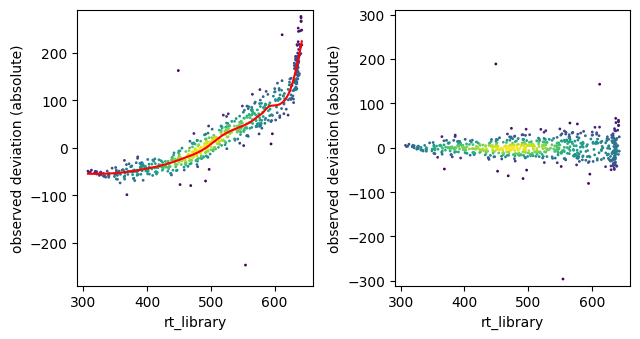

15:37:33.419746 INFO: === checking if epoch conditions were reached ===
15:37:33.421084 INFO:  rt_error       : 68.8057 > 1
15:37:33.422647 INFO: ❌ current_epoch  : 0 < 2
15:37:33.423645 INFO: ==============================================
15:37:33.425243 INFO: calibration group: precursor, predicting mz
15:37:33.426502 WARNING: mz prediction was skipped as it has not been fitted yet
15:37:33.427222 INFO: calibration group: precursor, predicting rt


score cutoff 84.44487783813477


15:37:36.622744 INFO: calibration group: fragment, predicting mz
15:37:45.796808 PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 24000 ===
15:37:45.890284 PROGRESS: Extracting batch of 47563 precursors
15:37:45.911450 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:37:45.912690 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:37:45.913544 INFO: FWHM in RT is 2.14 seconds, sigma is 0.37
15:37:45.914275 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:37:45.915629 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:03<00:00, 13056.48it/s]
15:37:51.630121 INFO: Starting candidate scoring
100%|██████████| 237630/237630 [00:05<00:00, 45351.70it/s]
15:37:57.818962 INFO: Finished candidate processing
15:37:57.820877 INFO: Collecting candidate features
15:37:59.429163 WARNING: intensity_correlation has 936 NaNs ( 0.40 % out of 233999)
15:37:59.431421 WARNING: height_correlation has 1 NaNs ( 0.00 % out of 233999)
15:37:59

Using classifier: 96a5f267d403fbef


100%|██████████| 150/150 [00:00<00:00, 14532.94it/s]
15:38:04.418638 INFO: Test AUC: 0.588
15:38:04.419806 INFO: Train AUC: 0.602
15:38:04.420635 INFO: AUC difference: 2.41%


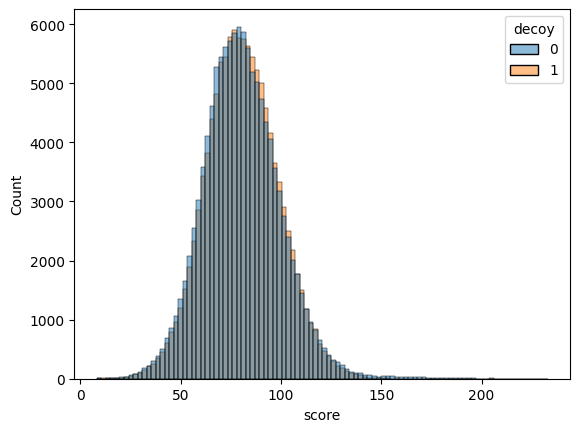

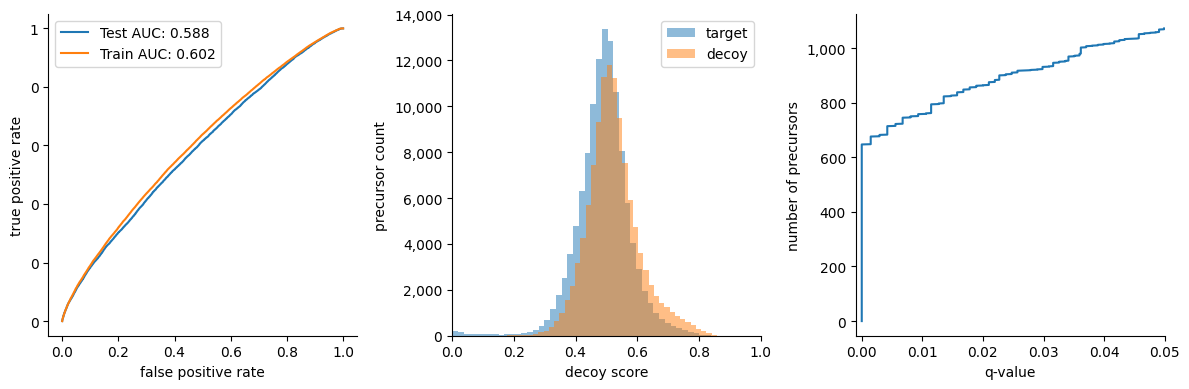

15:38:05.113631 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:38:05.116673 PROGRESS: ============================= Precursor FDR =============================
15:38:05.118124 PROGRESS: Total precursors accumulated: 1,332
15:38:05.119201 PROGRESS: Target precursors: 1,221 (91.67%)
15:38:05.120622 PROGRESS: Decoy precursors: 111 (8.33%)
15:38:05.121870 PROGRESS: 
15:38:05.123512 PROGRESS: Precursor Summary:
15:38:05.127074 PROGRESS: Channel   0:	 0.05 FDR: 1,022; 0.01 FDR:   752; 0.001 FDR:   648
15:38:05.127989 PROGRESS: 
15:38:05.128851 PROGRESS: Protein Summary:
15:38:05.132746 PROGRESS: Channel   0:	 0.05 FDR:   919; 0.01 FDR:   668; 0.001 FDR:   578
15:38:05.133629 PROGRESS: =========================================================================
15:38:05.137055 INFO: calibration group: precursor, fitting rt estimator 


Storing classifier: 7e782950ab178d82


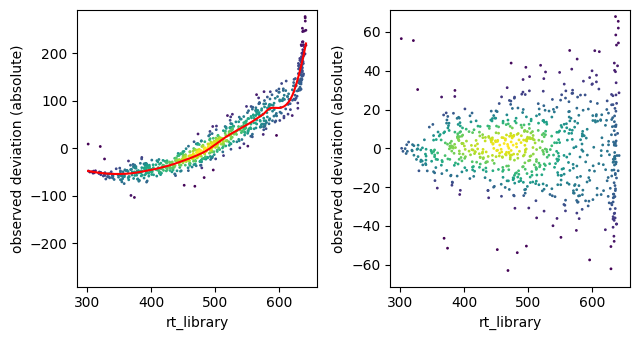

15:38:05.390178 INFO: === checking if epoch conditions were reached ===
15:38:05.391350 INFO:  rt_error       : 60.2910 > 1
15:38:05.392732 INFO: ❌ current_epoch  : 1 < 2
15:38:05.393831 INFO: ==============================================
15:38:05.394931 INFO: calibration group: precursor, predicting mz
15:38:05.396052 WARNING: mz prediction was skipped as it has not been fitted yet
15:38:05.396665 INFO: calibration group: precursor, predicting rt


score cutoff 85.11942502593995


15:38:08.616056 INFO: calibration group: fragment, predicting mz
15:38:17.772843 PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 24000 ===
15:38:17.863590 PROGRESS: Extracting batch of 47563 precursors
15:38:17.882829 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:38:17.883815 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:38:17.884477 INFO: FWHM in RT is 2.12 seconds, sigma is 0.36
15:38:17.885067 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:38:17.886019 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:03<00:00, 14242.71it/s]
15:38:23.292539 INFO: Starting candidate scoring
100%|██████████| 237673/237673 [00:05<00:00, 44397.58it/s]
15:38:29.617820 INFO: Finished candidate processing
15:38:29.619808 INFO: Collecting candidate features
15:38:31.238716 WARNING: intensity_correlation has 1064 NaNs ( 0.46 % out of 233548)
15:38:31.241169 WARNING: height_correlation has 1 NaNs ( 0.00 % out of 233548)
15:38:3

Using classifier: 96a5f267d403fbef


15:38:32.304617 WARNING: dropped 580 target PSMs due to missing features
15:38:32.305916 WARNING: dropped 484 decoy PSMs due to missing features
100%|██████████| 150/150 [00:00<00:00, 14226.02it/s]
15:38:36.609051 INFO: Test AUC: 0.589
15:38:36.610284 INFO: Train AUC: 0.602
15:38:36.611284 INFO: AUC difference: 2.22%


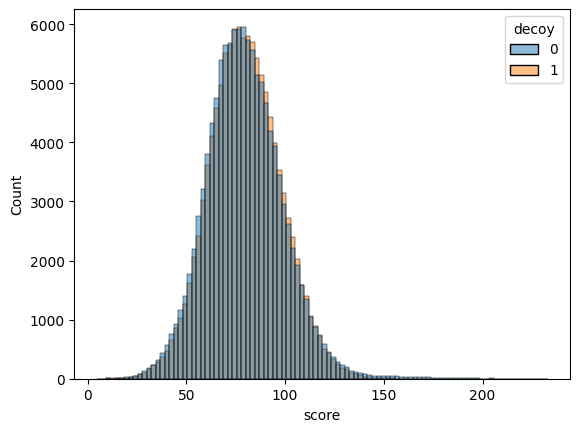

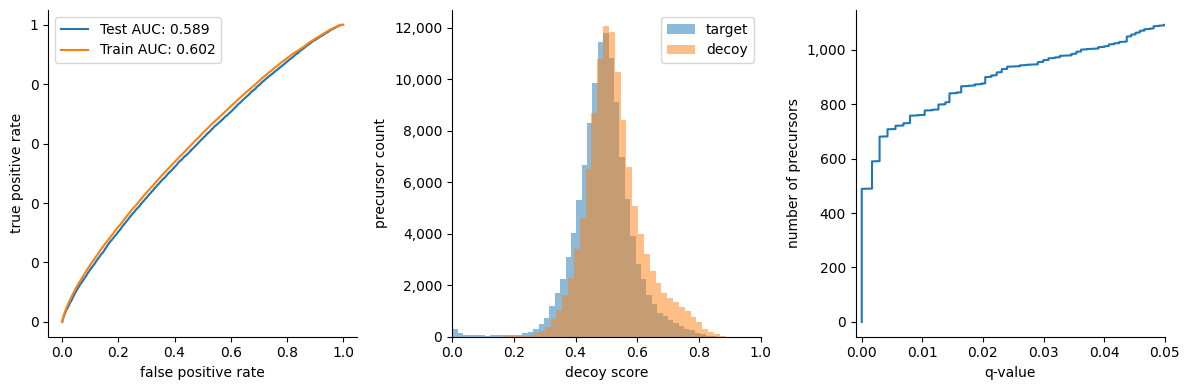

15:38:37.362395 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:38:37.365557 PROGRESS: ============================= Precursor FDR =============================
15:38:37.367049 PROGRESS: Total precursors accumulated: 1,451
15:38:37.368326 PROGRESS: Target precursors: 1,324 (91.25%)
15:38:37.369816 PROGRESS: Decoy precursors: 127 (8.75%)
15:38:37.371108 PROGRESS: 
15:38:37.372293 PROGRESS: Precursor Summary:
15:38:37.376922 PROGRESS: Channel   0:	 0.05 FDR: 1,041; 0.01 FDR:   754; 0.001 FDR:   490
15:38:37.377935 PROGRESS: 
15:38:37.378768 PROGRESS: Protein Summary:
15:38:37.382885 PROGRESS: Channel   0:	 0.05 FDR:   933; 0.01 FDR:   669; 0.001 FDR:   445
15:38:37.383723 PROGRESS: =========================================================================
15:38:37.387297 INFO: calibration group: precursor, fitting rt estimator 


Storing classifier: 85190c6996626757


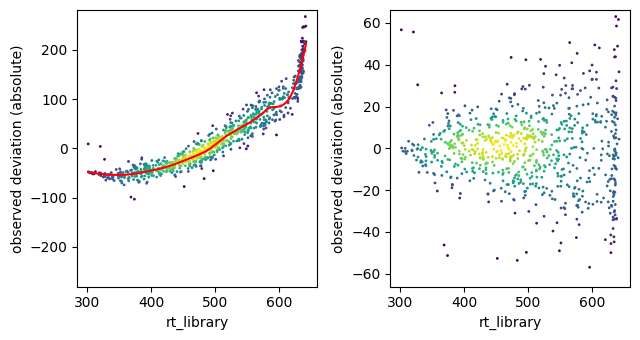

15:38:37.656669 INFO: === checking if epoch conditions were reached ===
15:38:37.657964 INFO:  rt_error       : 58.4077 > 1
15:38:37.659160 INFO: ✅ current_epoch  : 2 >= 2
15:38:37.660414 INFO: ==============================================
15:38:37.662427 INFO: calibration group: precursor, predicting mz
15:38:37.663713 WARNING: mz prediction was skipped as it has not been fitted yet
15:38:37.664411 INFO: calibration group: precursor, predicting rt


score cutoff 82.24795136260987


15:38:40.893603 INFO: calibration group: fragment, predicting mz
15:38:50.051417 PROGRESS: === Epoch 3, step 0, extracting elution groups 0 to 24000 ===
15:38:50.143023 PROGRESS: Extracting batch of 47563 precursors
15:38:50.162925 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:38:50.164172 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:38:50.165024 INFO: FWHM in RT is 2.13 seconds, sigma is 0.37
15:38:50.165778 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:38:50.166953 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:03<00:00, 14328.05it/s]
15:38:55.586086 INFO: Starting candidate scoring
100%|██████████| 237750/237750 [00:05<00:00, 46083.07it/s]
15:39:01.716458 INFO: Finished candidate processing
15:39:01.718398 INFO: Collecting candidate features
15:39:03.290547 WARNING: intensity_correlation has 1043 NaNs ( 0.45 % out of 233815)
15:39:03.292825 WARNING: height_correlation has 1 NaNs ( 0.00 % out of 233815)
15:39:0

Using classifier: 96a5f267d403fbef


100%|██████████| 150/150 [00:00<00:00, 14178.89it/s]
15:39:08.326006 INFO: Test AUC: 0.590
15:39:08.327235 INFO: Train AUC: 0.601
15:39:08.328078 INFO: AUC difference: 1.88%


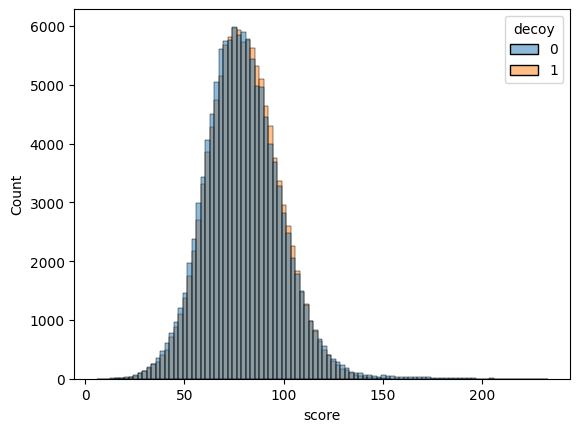

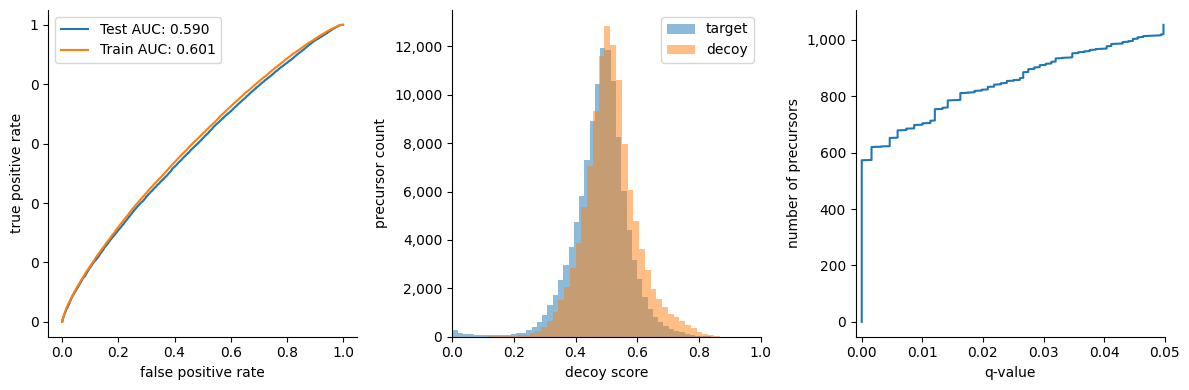

15:39:09.080815 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:39:09.083928 PROGRESS: ============================= Precursor FDR =============================
15:39:09.085377 PROGRESS: Total precursors accumulated: 1,319
15:39:09.086696 PROGRESS: Target precursors: 1,208 (91.58%)
15:39:09.087927 PROGRESS: Decoy precursors: 111 (8.42%)
15:39:09.089139 PROGRESS: 
15:39:09.090289 PROGRESS: Precursor Summary:
15:39:09.093917 PROGRESS: Channel   0:	 0.05 FDR: 1,004; 0.01 FDR:   693; 0.001 FDR:   574
15:39:09.094893 PROGRESS: 
15:39:09.095824 PROGRESS: Protein Summary:
15:39:09.100011 PROGRESS: Channel   0:	 0.05 FDR:   901; 0.01 FDR:   617; 0.001 FDR:   516
15:39:09.100896 PROGRESS: =========================================================================
15:39:09.104370 INFO: calibration group: precursor, fitting rt estimator 


Storing classifier: 9ce5efcc9fb283ae


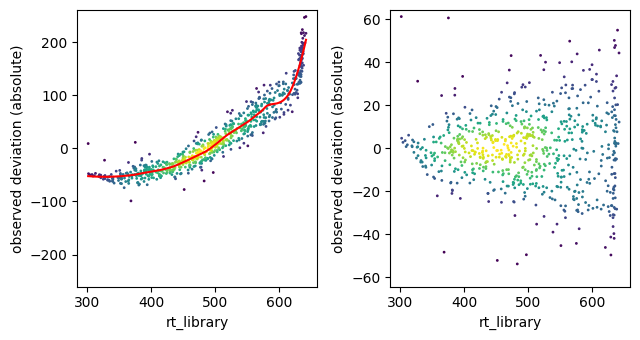

15:39:09.369367 INFO: === checking if epoch conditions were reached ===
15:39:09.370592 INFO:  rt_error       : 54.4990 > 1
15:39:09.371711 INFO: ✅ current_epoch  : 3 >= 2
15:39:09.372788 INFO: ==============================================
15:39:09.446947 PROGRESS: Optimal values for ['rt'] is/are {'ms2': 0            486.240570
1            261.126923
2            824.439026
3            412.722717
4            360.195496
               ...     
41372560    1005.528381
41372561     732.374451
41372562     788.916687
41372563    1301.714355
41372564     651.359680
Name: mz_calibrated, Length: 41372565, dtype: float32, 'rt': 0          319.504944
1          319.504944
2          331.885681
3          331.885681
4          475.099670
              ...    
3517492    474.855713
3517493    822.344666
3517494    822.344666
3517495    679.414734
3517496    679.414734
Name: rt_calibrated, Length: 3481959, dtype: float32, 'ms1': 0          508.790375
1          542.782043
2          534.78454

score cutoff 82.7926343383789
3
3
0
0
0


15:39:12.700566 INFO: calibration group: fragment, predicting mz
15:39:21.862769 PROGRESS: === Epoch 0, step 0, extracting elution groups 0 to 24000 ===
15:39:21.944778 PROGRESS: Extracting batch of 47563 precursors
15:39:21.963797 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:39:21.965052 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:39:21.965937 INFO: FWHM in RT is 2.16 seconds, sigma is 0.37
15:39:21.966705 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:39:21.967854 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:03<00:00, 15373.84it/s]
15:39:27.139932 INFO: Starting candidate scoring
100%|██████████| 237776/237776 [00:05<00:00, 45986.68it/s]
15:39:33.279055 INFO: Finished candidate processing
15:39:33.281614 INFO: Collecting candidate features
15:39:34.890853 WARNING: intensity_correlation has 1067 NaNs ( 0.46 % out of 233780)
15:39:34.893096 WARNING: height_correlation has 1 NaNs ( 0.00 % out of 233780)
15:39:3

Using classifier: aa8ddcf2c1f86174


15:39:35.971097 WARNING: dropped 571 target PSMs due to missing features
15:39:35.972584 WARNING: dropped 496 decoy PSMs due to missing features
100%|██████████| 150/150 [00:00<00:00, 14339.83it/s]
15:39:39.955386 INFO: Test AUC: 0.588
15:39:39.956595 INFO: Train AUC: 0.604
15:39:39.957421 INFO: AUC difference: 2.65%


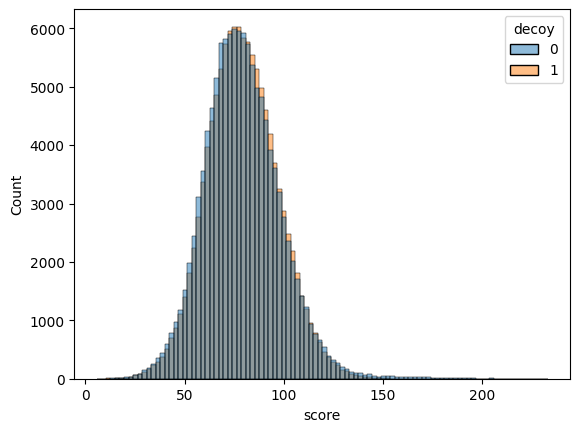

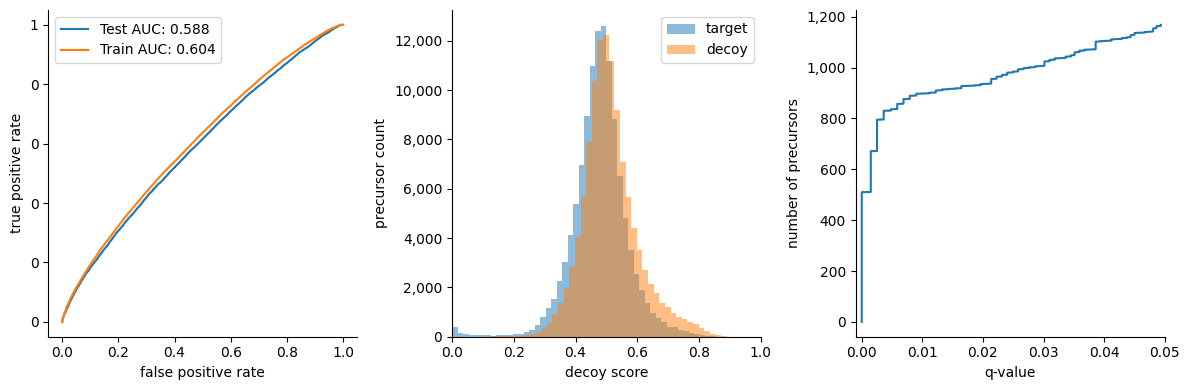

15:39:40.654271 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:39:40.657444 PROGRESS: ============================= Precursor FDR =============================
15:39:40.661448 PROGRESS: Total precursors accumulated: 1,436
15:39:40.662754 PROGRESS: Target precursors: 1,320 (91.92%)
15:39:40.664091 PROGRESS: Decoy precursors: 116 (8.08%)
15:39:40.665316 PROGRESS: 
15:39:40.666489 PROGRESS: Precursor Summary:
15:39:40.670552 PROGRESS: Channel   0:	 0.05 FDR: 1,114; 0.01 FDR:   890; 0.001 FDR:   511
15:39:40.671897 PROGRESS: 
15:39:40.672984 PROGRESS: Protein Summary:
15:39:40.677353 PROGRESS: Channel   0:	 0.05 FDR:   993; 0.01 FDR:   796; 0.001 FDR:   458
15:39:40.678248 PROGRESS: =========================================================================
15:39:40.681894 INFO: calibration group: precursor, fitting mz estimator 


Storing classifier: 1f6acbc091d1164c


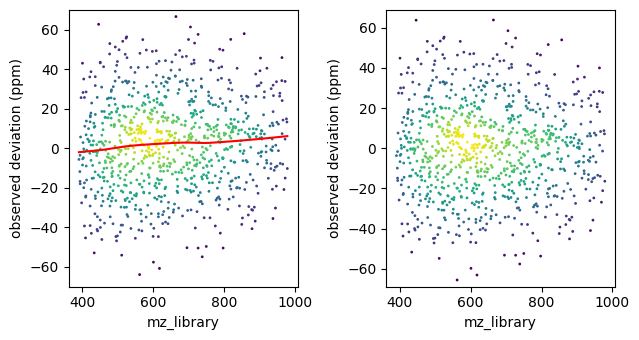

15:39:40.949057 INFO: === checking if epoch conditions were reached ===
15:39:40.950480 INFO:  ms1_error      : 59.9844 > 0.1
15:39:40.952020 INFO: ❌ current_epoch  : 0 < 2
15:39:40.953013 INFO: ==============================================
15:39:40.954259 INFO: calibration group: precursor, predicting mz


score cutoff 75.01186681365967


15:39:41.759950 INFO: calibration group: precursor, predicting rt
15:39:44.990220 INFO: calibration group: fragment, predicting mz
15:39:54.191985 PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 24000 ===
15:39:54.274406 PROGRESS: Extracting batch of 47563 precursors
15:39:54.295299 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:39:54.296546 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:39:54.297392 INFO: FWHM in RT is 2.08 seconds, sigma is 0.36
15:39:54.298172 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:39:54.299850 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:03<00:00, 15357.31it/s]
15:39:59.488720 INFO: Starting candidate scoring
100%|██████████| 237769/237769 [00:05<00:00, 46412.70it/s]
15:40:05.568556 INFO: Finished candidate processing
15:40:05.571786 INFO: Collecting candidate features
15:40:07.597855 WARNING: intensity_correlation has 1294 NaNs ( 0.55 % out of 233255)
15:40:07.636820 INFO

Using classifier: aa8ddcf2c1f86174


15:40:08.943375 WARNING: dropped 696 target PSMs due to missing features
15:40:08.944811 WARNING: dropped 598 decoy PSMs due to missing features
100%|██████████| 150/150 [00:00<00:00, 14216.05it/s]
15:40:13.141049 INFO: Test AUC: 0.586
15:40:13.142373 INFO: Train AUC: 0.599
15:40:13.143241 INFO: AUC difference: 2.11%


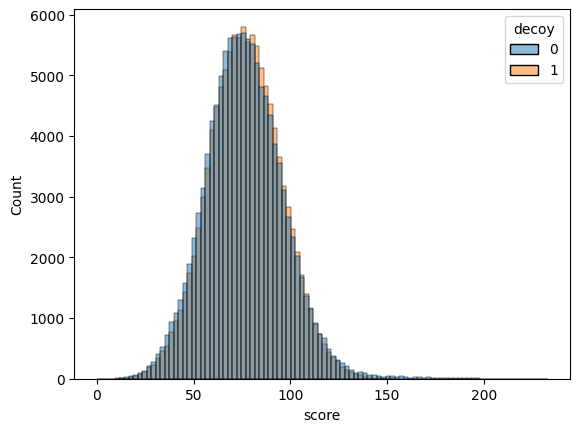

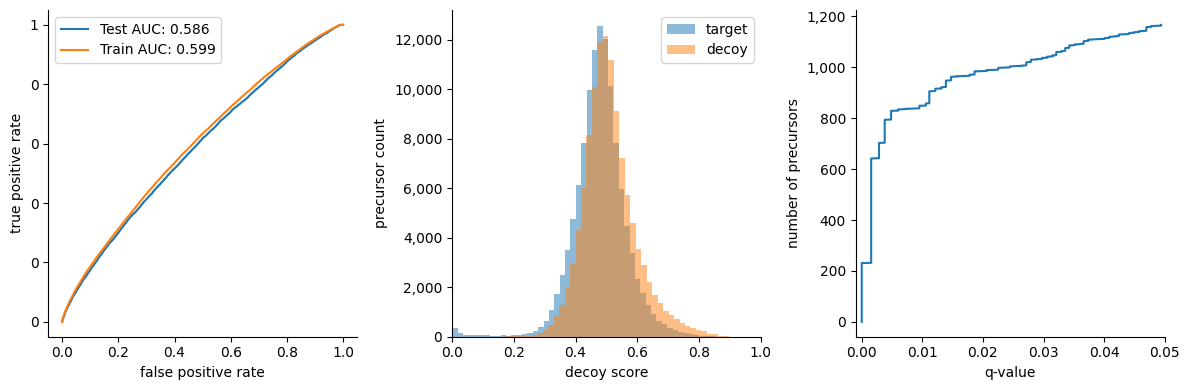

15:40:13.839276 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:40:13.842457 PROGRESS: ============================= Precursor FDR =============================
15:40:13.843806 PROGRESS: Total precursors accumulated: 1,476
15:40:13.845140 PROGRESS: Target precursors: 1,349 (91.40%)
15:40:13.846271 PROGRESS: Decoy precursors: 127 (8.60%)
15:40:13.847337 PROGRESS: 
15:40:13.848667 PROGRESS: Precursor Summary:
15:40:13.852836 PROGRESS: Channel   0:	 0.05 FDR: 1,113; 0.01 FDR:   842; 0.001 FDR:   232
15:40:13.854048 PROGRESS: 
15:40:13.855106 PROGRESS: Protein Summary:
15:40:13.859174 PROGRESS: Channel   0:	 0.05 FDR:   995; 0.01 FDR:   748; 0.001 FDR:   219
15:40:13.860052 PROGRESS: =========================================================================
15:40:13.863611 INFO: calibration group: precursor, fitting mz estimator 


Storing classifier: 9d3e05382286d155


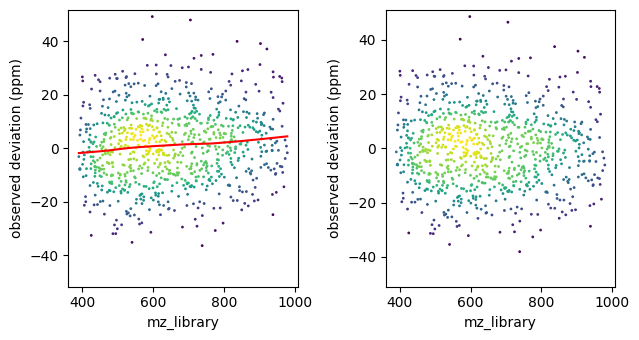

15:40:14.157314 INFO: === checking if epoch conditions were reached ===
15:40:14.158612 INFO:  ms1_error      : 36.7786 > 0.1
15:40:14.160200 INFO: ❌ current_epoch  : 1 < 2
15:40:14.161566 INFO: ==============================================
15:40:14.162850 INFO: calibration group: precursor, predicting mz


score cutoff 78.19954090881347


15:40:14.983519 INFO: calibration group: precursor, predicting rt
15:40:18.229926 INFO: calibration group: fragment, predicting mz
15:40:27.434821 PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 24000 ===
15:40:27.536044 PROGRESS: Extracting batch of 47563 precursors
15:40:27.559933 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
15:40:27.561223 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
15:40:27.562146 INFO: FWHM in RT is 2.10 seconds, sigma is 0.36
15:40:27.562931 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
15:40:27.564400 INFO: Starting candidate selection
100%|██████████| 47563/47563 [00:03<00:00, 15507.40it/s]
15:40:32.783773 INFO: Starting candidate scoring
100%|██████████| 237768/237768 [00:05<00:00, 47190.04it/s]
15:40:38.834959 INFO: Finished candidate processing
15:40:38.837898 INFO: Collecting candidate features
15:40:40.501117 WARNING: intensity_correlation has 1465 NaNs ( 0.63 % out of 232811)
15:40:40.503454 WARN

Using classifier: aa8ddcf2c1f86174


15:40:41.590258 WARNING: dropped 772 target PSMs due to missing features
15:40:41.591462 WARNING: dropped 693 decoy PSMs due to missing features
100%|██████████| 150/150 [00:00<00:00, 14209.63it/s]
15:40:45.861558 INFO: Test AUC: 0.575
15:40:45.862783 INFO: Train AUC: 0.591
15:40:45.863640 INFO: AUC difference: 2.80%


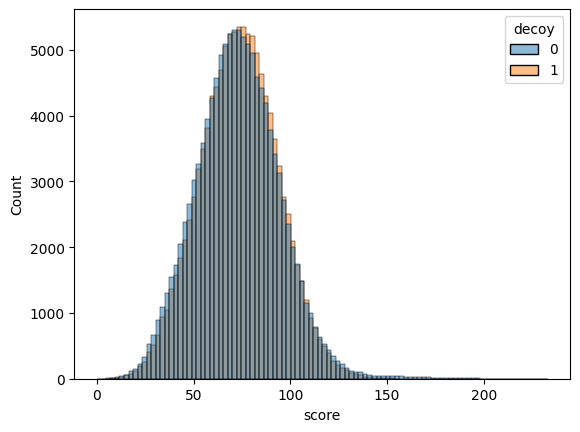

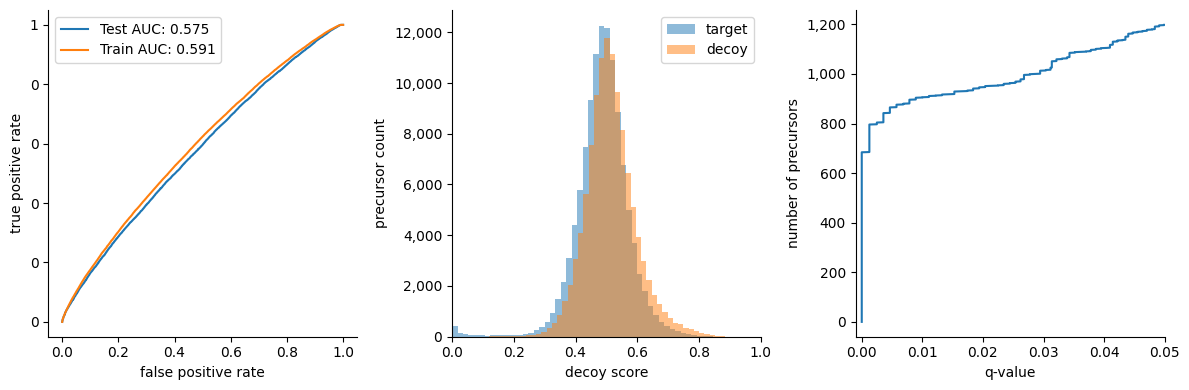

15:40:46.615566 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
15:40:46.618855 PROGRESS: ============================= Precursor FDR =============================
15:40:46.620069 PROGRESS: Total precursors accumulated: 1,442
15:40:46.621300 PROGRESS: Target precursors: 1,320 (91.54%)
15:40:46.622694 PROGRESS: Decoy precursors: 122 (8.46%)
15:40:46.624077 PROGRESS: 
15:40:46.625682 PROGRESS: Precursor Summary:
15:40:46.630214 PROGRESS: Channel   0:	 0.05 FDR: 1,142; 0.01 FDR:   897; 0.001 FDR:   685
15:40:46.631724 PROGRESS: 
15:40:46.632690 PROGRESS: Protein Summary:
15:40:46.637197 PROGRESS: Channel   0:	 0.05 FDR: 1,024; 0.01 FDR:   795; 0.001 FDR:   608
15:40:46.638204 PROGRESS: =========================================================================
15:40:46.642145 INFO: calibration group: precursor, fitting mz estimator 


Storing classifier: 8ee73a39647bfdbb


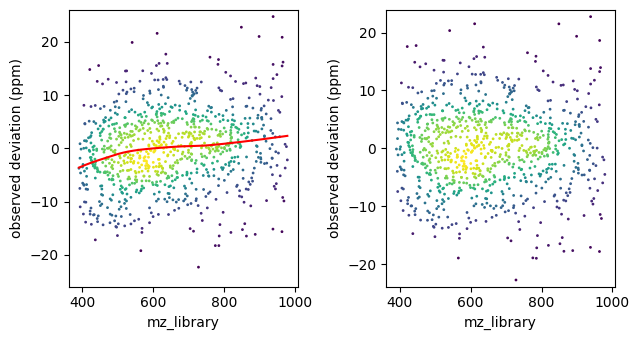

15:40:46.911874 INFO: === checking if epoch conditions were reached ===
15:40:46.913435 INFO:  ms1_error      : 20.2585 > 0.1
15:40:46.914935 INFO: ✅ current_epoch  : 2 >= 2
15:40:46.916327 INFO: ==============================================
15:40:46.924134 PROGRESS: Optimal values for ['ms1', 'mobility'] is/are {'ms2': 0            486.240570
1            261.126923
2            824.439026
3            412.722717
4            360.195496
               ...     
41372560    1005.528381
41372561     732.374451
41372562     788.916687
41372563    1301.714355
41372564     651.359680
Name: mz_calibrated, Length: 41372565, dtype: float32, 'rt': 0          321.600128
1          321.600128
2          334.006683
3          334.006683
4          475.280548
              ...    
3517492    475.039917
3517493    817.727356
3517494    817.727356
3517495    679.613770
3517496    679.613770
Name: rt_calibrated, Length: 3481959, dtype: float32, 'ms1': 0          508.790710
1          542.782776
2    

score cutoff 65.66559216308593
2
2
-1
0
-1


KeyError: -1

In [513]:
workflow.calibration(param_calibration_order = [['ms2'], ['rt'], ['ms1', 'mobility']])

In [505]:
workflow.com.current_epoch

0

In [503]:
workflow.com.precursor_number

[745, 3037, 4317, 4053, 3607, 2440, 2971, 3016, 2952]

In [504]:
workflow.com.ms2_list

[100,
 29.306874809950564,
 10.549851570243558,
 4.143247376071621,
 2.827079063758929,
 1.8421070286613261,
 1.8421070286613261,
 1.8421070286613261,
 1.8421070286613261,
 1.8421070286613261]

In [94]:
workflow.com.calibrations[workflow.param_index][workflow.com.current_epoch]['rt']

KeyError: -1

In [77]:
workflow.com.ms2_list[:6]

[100,
 36.073153281147334,
 14.299347878654645,
 5.465135041503158,
 3.425225098119014,
 2.5477041835016077]

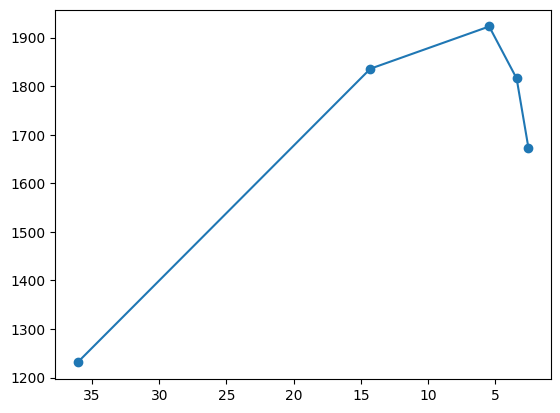

In [91]:
fig, ax = plt.subplots()
ax.plot(workflow.com.ms2_list[1:6], workflow.com.precursor_number[1:6], linestyle='-')
ax.scatter(workflow.com.ms2_list[1:6], workflow.com.precursor_number[1:6])
ax.invert_xaxis()
plt.savefig("debugging_files/ms2_plot.png", dpi=300)
plt.show()

In [79]:
workflow.com.precursor_number

[210, 1231, 1836, 1923, 1816, 1673, 1955, 1910, 1846]

In [62]:
np.argmax([workflow.com.precursor_proportion[-2], workflow.com.precursor_proportion[-3]])

0

In [59]:
np.asarray([-1, 0], dtype=str)

array(['-1', '0'], dtype='<U2')

In [448]:
workflow.com.calibrations[workflow.param_index][workflow.com.current_epoch-2]


KeyError: 3

In [444]:
param='ms2'

workflow.spectral_library.fragment_df[f"{workflow.com.param_colname_dict[param]}_calibrated"] = workflow.com.calibrations[workflow.param_index][workflow.com.current_epoch-2][param]




KeyError: 3

In [430]:
workflow.com.precursor_proportion[-1] < 1.1 * workflow.com.precursor_proportion[-2] and workflow.com.precursor_proportion[-1] < 1.1 * workflow.com.precursor_proportion[-3]




False

In [424]:
workflow.com.precursor_proportion

[0.025625, 0.020785714285714286, 0.03366071428571429]

In [414]:
workflow.com.current_epoch

2

In [453]:
workflow.com.calibrations[0]

{}

10:43:08.400481 INFO: calibration group: precursor, predicting mz
10:43:08.402834 WARNING: mz prediction was skipped as it has not been fitted yet
10:43:08.403691 INFO: calibration group: precursor, predicting rt
10:43:08.404972 WARNING: rt prediction was skipped as it has not been fitted yet
10:43:08.405632 INFO: calibration group: fragment, predicting mz
10:43:08.407462 WARNING: mz prediction was skipped as it has not been fitted yet
10:43:08.557315 PROGRESS: Extracting batch of 110933 precursors
10:43:08.610068 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
10:43:08.611236 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
10:43:08.612125 INFO: FWHM in RT is 5.00 seconds, sigma is 0.86
10:43:08.612867 INFO: FWHM in mobility is 0.010 1/K_0, sigma is 1.00
10:43:08.614191 INFO: Starting candidate selection
100%|██████████| 110933/110933 [00:49<00:00, 2244.09it/s]
10:43:59.955084 INFO: Starting candidate scoring
100%|██████████| 110933/110933 [00:03<00:00, 

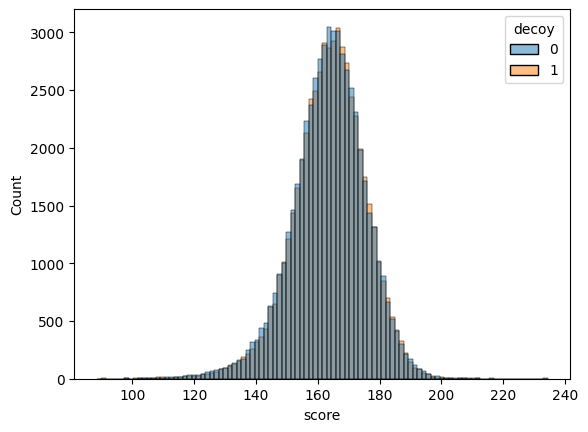

In [327]:
workflow.start_of_epoch(0)
fedf, frdf = workflow.extract_batch(workflow.calibration_df)

In [328]:
workflow.fdr_manager.classifier_store

{'fa9945ae23db872d': <alphadia.fdrexperimental.BinaryClassifierLegacyNewBatching at 0x149932cd7e10>,
 '715e351002075dbf': <alphadia.fdrexperimental.BinaryClassifierLegacyNewBatching at 0x14996cb7e310>,
 'ef18ae0c811f6ae2': <alphadia.fdrexperimental.BinaryClassifierLegacyNewBatching at 0x14996cb7e310>}

10:44:23.984001 INFO: performing precursor FDR with 47 features
10:44:23.985276 INFO: Decoy channel: -1
10:44:23.986070 INFO: Competetive: True


Using classifier: 715e351002075dbf


100%|██████████| 149/149 [00:00<00:00, 14209.25it/s]
10:44:26.052393 INFO: Test AUC: 0.600
10:44:26.053641 INFO: Train AUC: 0.615
10:44:26.054656 INFO: AUC difference: 2.42%


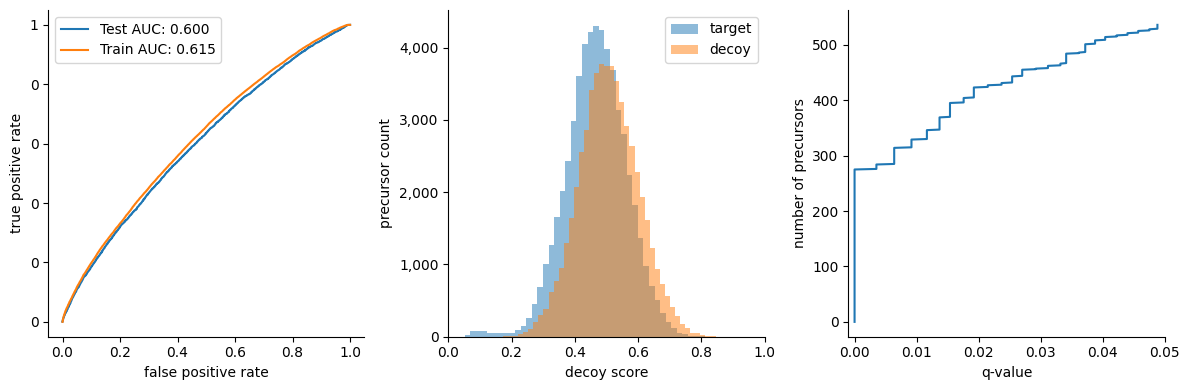

Storing classifier: 715e351002075dbf


In [329]:
prdf = workflow.fdr_correction(fedf, frdf)





In [330]:
sum(prdf.qval < 0.01)

330

In [286]:
np.sum(workflow.final_precursor_df.qval<0.01)

727

In [257]:
sorted_final_features_df = workflow.final_features_df.sort_values(
    by=["elution_group_idx", "base_width_rt"]
)

In [254]:
workflow.temp_feature_df.sort_values(by=["elution_group_idx", "base_width_rt"])

base_width_mobility  base_width_rt  rt_observed  mobility_observed  \
1                       0.0      10.142273   527.551697           0.000001   
0                       0.0      14.636658   530.906494           0.000001   
2                       0.0      12.294983   457.376373           0.000001   
3                       0.0      12.615784   317.329987           0.000001   
5                       0.0      10.148743   443.875153           0.000001   
...                     ...            ...          ...                ...   
237632                  0.0      16.302063   777.452515           0.000001   
237634                  0.0      10.660828   655.085571           0.000001   
237635                  0.0      17.140472   514.940674           0.000001   
237637                  0.0      11.355225   805.171265           0.000001   
237636                  0.0      17.920776   669.385986           0.000001   

        mono_ms1_intensity  top_ms1_intensity  sum_ms1_intensity  \
1             3.417266e+08       3.417266e+08       6.841307e+08   
0             5.066205e+08       5.066205e+08       1.024421e+09   
2             1.285461e+08       1.285461e+08       1.931904e+09   
3             1.293429e+08       1.293429e+08       6.202722e+09   
5             1.077157e+09       1.077157e+09       1.640768e+09   
...                    ...                ...                ...   
237632        9.432587e+07       6.279192e+07       1.616049e+08   
237634        3.290415e+06       1.042172e+08       1.239358e+08   
237635        0.000000e+00       1.622345e+09       2.851641e+09   
237637        2.372931e+08       2.668186e+07       2.813232e+08   
237636        7.736358e+07       4.548826e+06       5.240061e+08   

        weighted_ms1_intensity  weighted_mass_deviation  weighted_mass_error  \
1                 2.462184e+08               -29.643946            29.643946   
0                 3.602979e+08               -25.807425            25.807425   
2                 4.879394e+08                39.956871            39.956871   
3                 1.569012e+09                 4.911812             4.911812   
5                 7.276073e+08                 4.742783             4.742783   
...                        ...                      ...                  ...   
237632            4.379094e+07                16.538832            16.538832   
237634            3.880046e+07                10.560783            10.560783   
237635            8.786964e+08                 0.417127             0.417127   
237637            6.042792e+07                -1.457267             1.457267   
237636            1.452955e+08               -17.656046            17.656046   

        ...                  genes                           mods       i_1  \
1       ...            TT21B_HUMAN              Carbamidomethyl@C  0.313971   
0       ...            TT21B_HUMAN              Carbamidomethyl@C  0.313971   
2       ...            TANC1_HUMAN                                 0.306749   
3       ...            TANC1_HUMAN                                 0.306749   
5       ...            DSRAD_HUMAN                                 0.324788   
...     ...                    ...                            ...       ...   
237632  ...            WDR59_YEAST                                 0.338304   
237634  ...            S35F2_HUMAN  Oxidation@M;Carbamidomethyl@C  0.320050   
237635  ...            S35F2_HUMAN  Oxidation@M;Carbamidomethyl@C  0.320050   
237637  ...  NEPI_ECOLI;NEPI_ECOBW                    Oxidation@M  0.316749   
237636  ...  NEPI_ECOLI;NEPI_ECOBW                    Oxidation@M  0.316749   

        rt_library  flat_frag_stop_idx       i_3    delta_rt  n_K  n_R  n_P  
1       554.237549            20690821  0.042427  -26.685852    0    1    0  
0       554.237549                 196  0.042427  -23.331055    0    1    0  
2       441.716125                 304  0.057005   15.660248    1    0    0  
3       441.716125            20

In [185]:
np.all(np.sort(workflow.final_features_df.elution_group_idx) == np.sort(workflow.temp_feature_df.elution_group_idx))

True

10:02:28.426319 INFO: performing precursor FDR with 47 features
10:02:28.427644 INFO: Decoy channel: -1
10:02:28.429635 INFO: Competetive: True


Using classifier: 715e351002075dbf


100%|██████████| 150/150 [00:00<00:00, 14289.67it/s]
10:02:32.823686 INFO: Test AUC: 0.610
10:02:32.824890 INFO: Train AUC: 0.624
10:02:32.825735 INFO: AUC difference: 2.36%


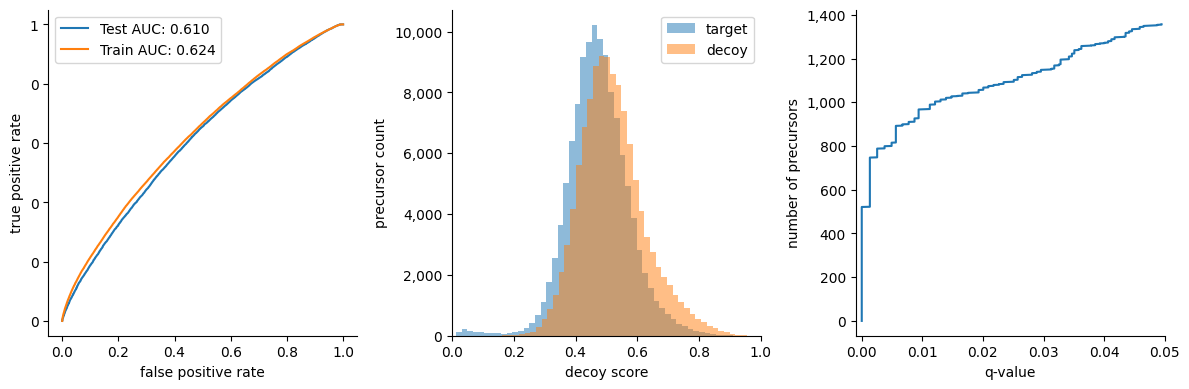

Storing classifier: 715e351002075dbf


In [264]:
final_test_precursor_df = workflow.fdr_correction(workflow.final_features_df, workflow.final_fragments_df)


10:02:16.307572 INFO: performing precursor FDR with 47 features
10:02:16.308953 INFO: Decoy channel: -1
10:02:16.309844 INFO: Competetive: True


Using classifier: 715e351002075dbf


100%|██████████| 150/150 [00:00<00:00, 14291.29it/s]
10:02:20.642911 INFO: Test AUC: 0.600
10:02:20.644148 INFO: Train AUC: 0.622
10:02:20.644973 INFO: AUC difference: 3.39%


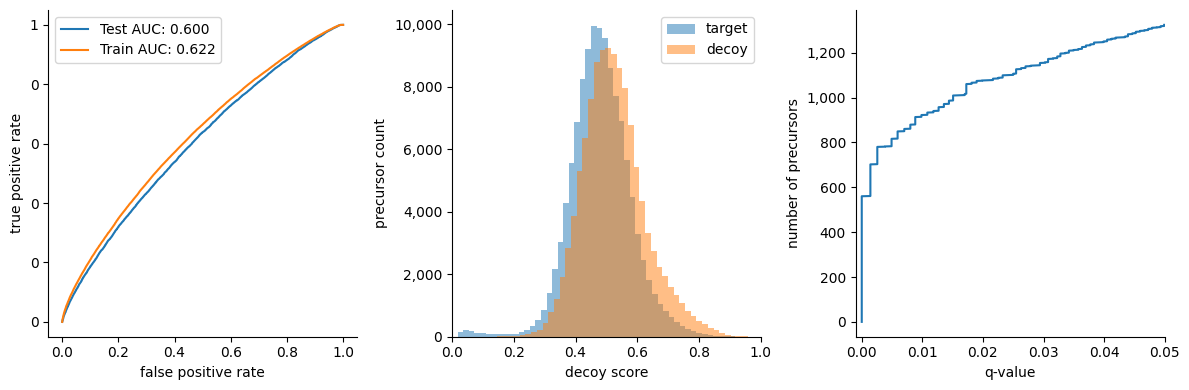

Storing classifier: 715e351002075dbf


In [262]:
temp_test_precursor_df = workflow.fdr_correction(workflow.temp_feature_df, workflow.temp_fragment_df)

In [265]:
sum(np.sort(final_test_precursor_df.qval) < 0.01)

968

In [263]:
sum(np.sort(temp_test_precursor_df.qval) < 0.01)

923

In [179]:
workflow.temp_feature_df.sort_values('genes')

base_width_mobility  base_width_rt  rt_observed  mobility_observed  \
155654                  0.0      10.236755   544.622742           0.000001   
155653                  0.0      17.156189   547.935852           0.000001   
167144                  0.0      13.039978   645.539490           0.000001   
167143                  0.0      12.341827   453.970154           0.000001   
161151                  0.0      10.222351   493.467407           0.000001   
...                     ...            ...          ...                ...   
45966                   0.0      10.085876   442.735535           0.000001   
15728                   0.0      10.083649   358.444183           0.000001   
10233                   0.0      10.253906   350.515564           0.000001   
98162                   0.0      12.841064   616.441650           0.000001   
15727                   0.0      10.299286   323.116241           0.000001   

        mono_ms1_intensity  top_ms1_intensity  sum_ms1_intensity  \
155654        1.614133e+07       8.941484e+08       9.241640e+08   
155653        5.191182e+07       9.153859e+08       9.882124e+08   
167144        8.166363e+08       7.902125e+08       2.145579e+09   
167143        2.944575e+09       2.074142e+09       5.892857e+09   
161151        1.138095e+08       1.413931e+08       5.132059e+08   
...                    ...                ...                ...   
45966         4.776859e+09       4.776859e+09       9.082584e+09   
15728         2.262098e+08       2.262098e+08       1.393781e+09   
10233         2.295085e+09       2.295085e+09       3.643436e+09   
98162         1.593164e+08       1.593164e+08       2.946182e+08   
15727         9.486653e+08       9.486653e+08       1.757283e+09   

        weighted_ms1_intensity  weighted_mass_deviation  weighted_mass_error  \
155654            3.253076e+08                47.029781            47.029781   
155653            3.455097e+08                53.228767            53.228767   
167144            6.557491e+08                46.315624            46.315624   
167143            1.853870e+09                46.633430            46.633430   
161151            1.437730e+08                 1.959882             1.959882   
...                        ...                      ...                  ...   
45966             3.491091e+09                48.920506            48.920506   
15728             3.994116e+08                -1.769512             1.769512   
10233             1.368312e+09                11.686883            11.686883   
98162             1.136264e+08               -68.414795            68.414795   
15727             7.316513e+08                31.128942            31.128942   

        ...        genes                                 mods       i_1  \
155654  ...  1433B_HUMAN                                       0.354684   
155653  ...  1433B_HUMAN                                       0.354684   
167144  ...  1433E_HUMAN                          Oxidation@M  0.347073   
167143  ...  1433E_HUMAN                          Oxidation@M  0.347073   
161151  ...  1433F_HUMAN                                       0.356651   
...     ...          ...                                  ...       ...   
45966   ...   ZZZ3_HUMAN  Carbamidomethyl@C;Carbamidomethyl@C  0.294889   
15728   ...   ZZZ3_HUMAN                                       0.285992   
10233   ...   ZZZ3_HUMAN  Carbamidomethyl@C;Carbamidomethyl@C  0.323284   
98162   ...   ZZZ3_HUMAN                                       0.345021   
15727   ...   ZZZ3_HUMAN                                       0.285992   

        rt_library  flat_frag_stop_idx       i_3    delta_rt  n_K  n_R  n_P  
155654  562.882996            34102696  0.107161  -18.260254    0    0    0  
155653  562.882996            13420648  0.107161  -14.947144    0    0    0  
167144  517.409302            35104653  0.108841  128.130188    1    0    0  
167143  517.409302            14422629  0.108841  -63.439148    1    0    0  
16

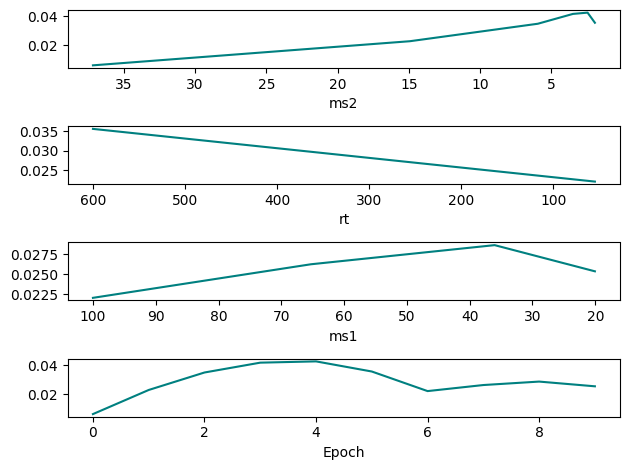

In [78]:
fig, ax = plt.subplots(4,1)

ax[0].plot(workflow.ms2_list[:6], workflow.precursor_proportion[:6], c='teal', label='Calibration Data')
ax[0].set_xlabel('ms2')
ax[0].invert_xaxis()
ax[1].plot(workflow.rt_list[5:7], workflow.precursor_proportion[5:7], c='teal', label='Calibration Data')
ax[1].set_xlabel('rt')
ax[1].invert_xaxis()
ax[2].plot(workflow.ms1_list[6:], workflow.precursor_proportion[6:], c='teal', label='Calibration Data')
ax[2].set_xlabel('ms1')
ax[2].invert_xaxis()
ax[3].plot(np.arange(len(workflow.precursor_proportion)), workflow.precursor_proportion, c='teal', label='Calibration Data')
ax[3].set_xlabel('Epoch')
plt.tight_layout()
#plt.savefig(f'{OUTPUT_FOLDER}debugging/proportion_ms2_rt_ms1_calibration.png', dpi=300)
plt.show()

In [76]:
''.join(['a', 'b', 'c'])

'abc'

In [286]:
plotting_df = pd.DataFrame(workflow.precursor_df_list)
plotting_df['proportion'] = workflow.calib_test_proportion
plotting_df = plotting_df / plotting_df.max(axis=0)
plotting_df = plotting_df / plotting_df.max(axis=0)  # To cope with negative columns
plotting_df['rt'] = workflow.rt_list
plotting_df_tidy = plotting_df.melt(id_vars=['rt'])

In [169]:
import plotly.express as px

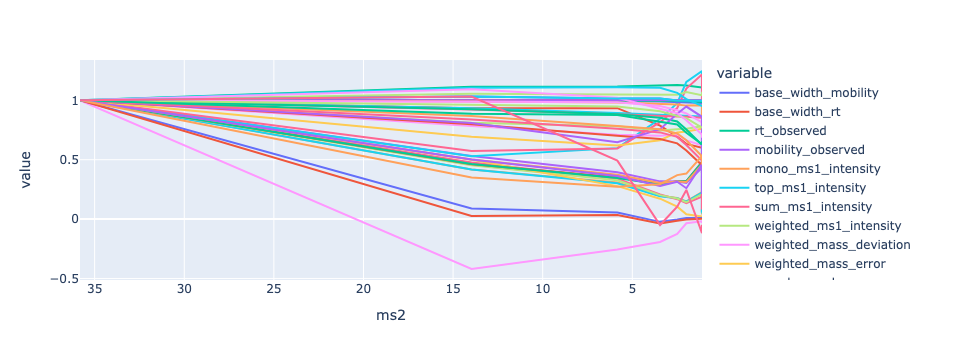

In [203]:
# Create the Plotly figure
fig = px.line(plotting_df_tidy, x='ms2', y='value', color='variable')

# Reverse the x-axis
fig.update_layout(xaxis=dict(autorange='reversed'))

# Show the plot
fig.show()

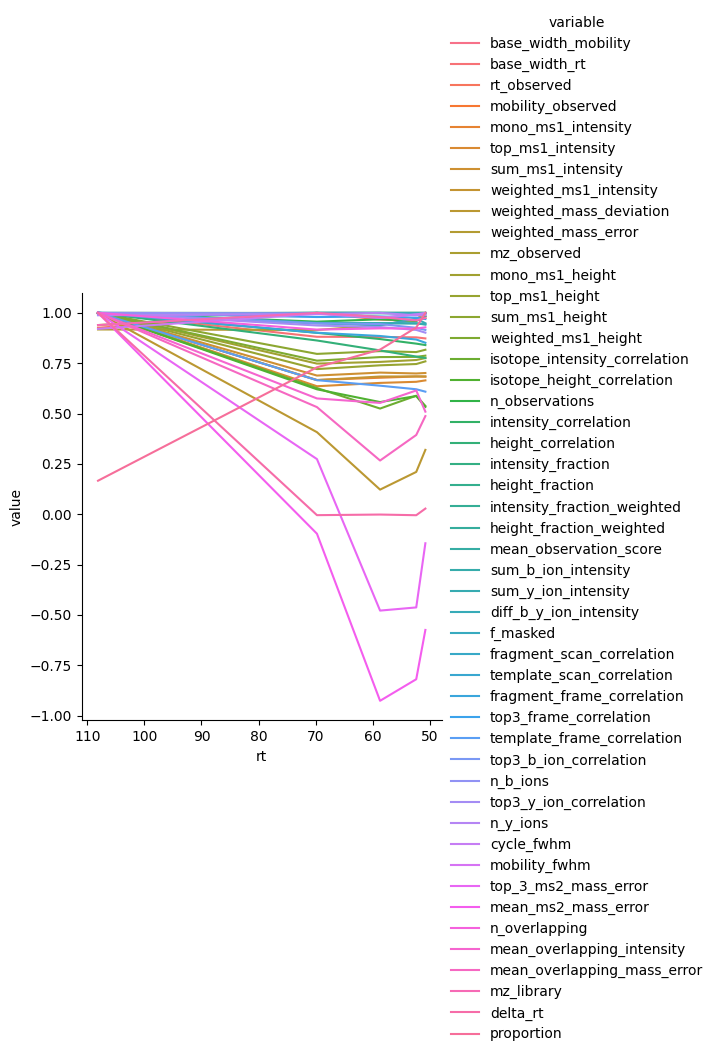

In [285]:
import seaborn as sns
g = sns.relplot(plotting_df_tidy, kind='line', x='rt', y='value', hue='variable', ax=ax1)
g.set(xlim=g.ax.get_xlim()[::-1])
plt.show()

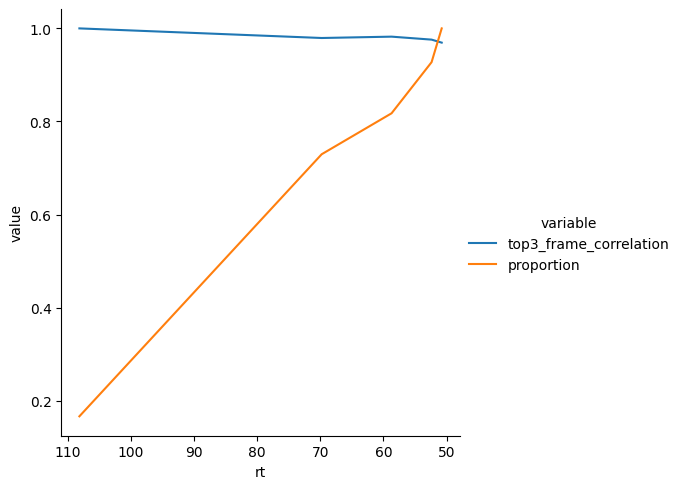

In [293]:
g = sns.relplot(plotting_df_tidy[plotting_df_tidy['variable'].isin(['top3_frame_correlation', 'proportion'])], kind='line', x='rt', y='value', hue='variable')
g.set(xlim=g.ax.get_xlim()[::-1])
#plt.savefig(f'{OUTPUT_FOLDER}debugging/proportion_of_max_rt_calibration.png', dpi=300)
plt.show()

In [197]:
y = plotting_df['proportion']

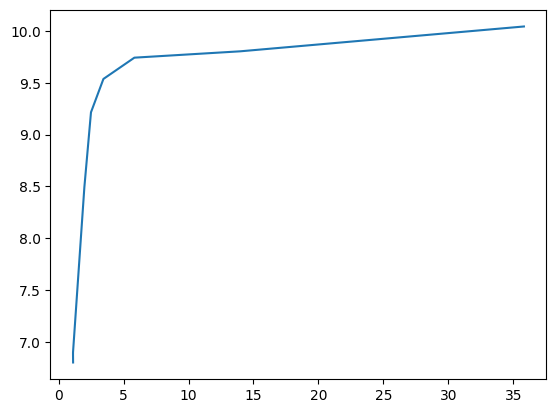

In [198]:
plt.plot(plotting_df['ms2'], y)
plt.show()

0:46:18.222662 INFO: calibration group: precursor, predicting mz
0:46:18.699327 INFO: calibration group: precursor, predicting rt
0:46:19.212572 INFO: calibration group: fragment, predicting mz
0:46:21.199798 PROGRESS: Extracting batch of 481467 precursors
0:46:22.166090 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:46:22.167055 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:46:22.168246 INFO: FWHM in RT is 3.06 seconds, sigma is 0.42
0:46:22.168897 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:46:22.180865 INFO: Starting candidate selection
100%|██████████| 481467/481467 [03:04<00:00, 2611.28it/s]
0:49:38.518982 INFO: Applying score cutoff of 41.38192577362061
0:49:39.792369 INFO: Removed 624002 precursors with score below cutoff
0:49:43.388250 INFO: Starting candidate scoring
100%|██████████| 1000/1000 [01:30<00:00, 11.06it/s]
0:51:20.960183 INFO: Finished candidate processing
0:51:20.986615 INFO: Collecting candidate features
0:51:41.5

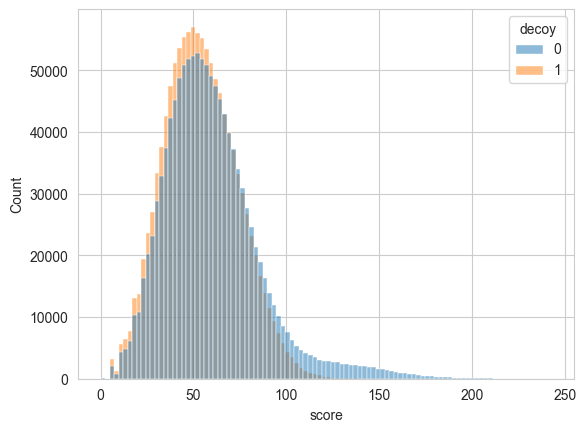

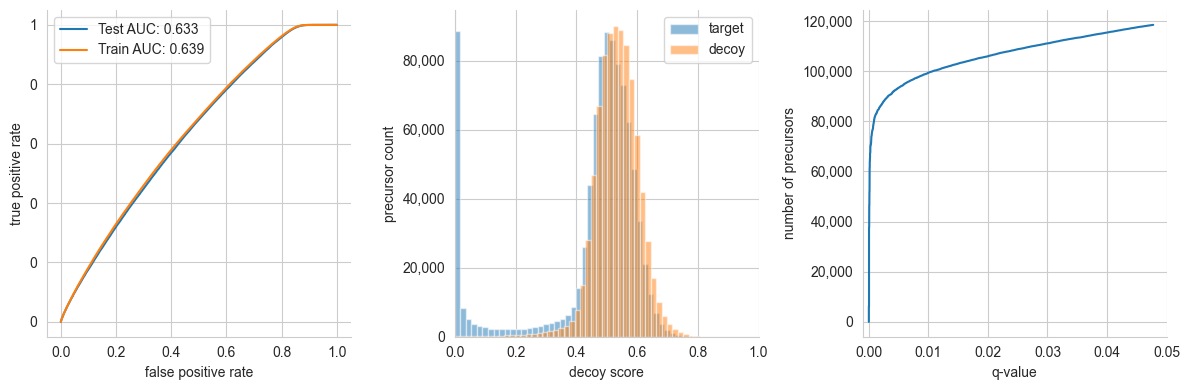

0:53:50.416393 INFO: Removing fragments below FDR threshold
0:53:52.505206 PROGRESS: ============================= Precursor FDR =============================
0:53:52.520319 PROGRESS: Total precursors accumulated: 99,339
0:53:52.521444 PROGRESS: Target precursors: 98,356 (99.01%)
0:53:52.522378 PROGRESS: Decoy precursors: 983 (0.99%)
0:53:52.523137 PROGRESS: 
0:53:52.523748 PROGRESS: Precursor Summary:
0:53:52.596824 PROGRESS: Channel   0:	 0.05 FDR: 98,356; 0.01 FDR: 98,356; 0.001 FDR: 81,618
0:53:52.597826 PROGRESS: 
0:53:52.598484 PROGRESS: Protein Summary:
0:53:52.705212 PROGRESS: Channel   0:	 0.05 FDR: 10,314; 0.01 FDR: 10,314; 0.001 FDR: 9,346
0:53:52.752980 PROGRESS: =========================================================================


(        base_width_mobility  base_width_rt  rt_observed  mobility_observed  \
 71337                   0.0      23.299622   679.788635           0.000001   
 92122                   0.0      20.210022   873.802917           0.000001   
 98268                   0.0      35.635681   796.254944           0.000001   
 26874                   0.0      29.484314   693.778687           0.000001   
 81602                   0.0      20.201294   484.358032           0.000001   
 ...                     ...            ...          ...                ...   
 1300                    0.0      10.838318   797.801331           0.000001   
 100804                  0.0      10.822876   588.340332           0.000001   
 77650                   0.0      13.951904   689.128296           0.000001   
 55103                   0.0      10.815002   654.966003           0.000001   
 110320                  0.0      17.057251   667.354980           0.000001   
 
         mono_ms1_intensity  top_ms1_intensity  su

In [12]:
workflow.extraction()

In [13]:
test_df = workflow.spectral_library.precursor_df.sample(1000)

In [14]:
from alphadia.peakgroup import search  # Changed this; original was from alphadia import hybridselection

config = search.HybridCandidateConfig()
config.update(workflow.config["selection_config"])
config.update(
    {
        "rt_tolerance": workflow.com.rt_error,
        "mobility_tolerance": workflow.com.mobility_error,
        "candidate_count": workflow.com.num_candidates,
        "precursor_mz_tolerance": workflow.com.ms1_error,
        "fragment_mz_tolerance": workflow.com.ms2_error,
        "exclude_shared_ions": workflow.config["search"]["exclude_shared_ions"],
    }
)

extraction = search.HybridCandidateSelection(
    workflow.dia_data.jitclass(),
    test_df,
    workflow.spectral_library.fragment_df,
    config.jitclass(),
    rt_column=f"rt_{workflow.com.column_type}",
    mobility_column=f"mobility_{workflow.com.column_type}",
    precursor_mz_column=f"mz_{workflow.com.column_type}",
    fragment_mz_column=f"mz_{workflow.com.column_type}",
    fwhm_rt=workflow.optimization_manager.fwhm_rt,
    fwhm_mobility=workflow.optimization_manager.fwhm_mobility,
)
candidates_df = extraction(thread_count=workflow.config["general"]["thread_count"])

0:53:56.106614 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:53:56.107287 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:53:56.108294 INFO: FWHM in RT is 3.06 seconds, sigma is 0.42
0:53:56.108704 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:53:56.119786 INFO: Starting candidate selection


KeyError: 'mobility_calibrated'

In [ ]:
from alphadia import plexscoring

config = plexscoring.CandidateConfig()
config.update(workflow.config["scoring_config"])
config.update(
    {
        "precursor_mz_tolerance": workflow.com.ms1_error,
        "fragment_mz_tolerance": workflow.com.ms2_error,
        "exclude_shared_ions": workflow.config["search"]["exclude_shared_ions"],
    }
)

candidate_scoring = plexscoring.CandidateScoring(
    workflow.dia_data.jitclass(),
    workflow.spectral_library._precursor_df,
    workflow.spectral_library._fragment_df,
    config=config,
    rt_column=f"rt_{workflow.com.column_type}",
    mobility_column=f"mobility_{workflow.com.column_type}",
    precursor_mz_column=f"mz_{workflow.com.column_type}",
    fragment_mz_column=f"mz_{workflow.com.column_type}",
)

features_df, fragments_df = candidate_scoring(
    candidates_df,
    thread_count=workflow.config["general"]["thread_count"],
)